In [10]:
import pandas as pd
import seaborn as sns
# importing libraries
import numpy as np
import matplotlib.pyplot as plt

In [11]:
DL_features  = pd.read_csv('/data4/hrehman/Clinical_Data/distribution_data_DL.csv')
DL_features = DL_features.iloc[:,1:]
DL_features

original_firstorder_10Percentile  original_firstorder_90Percentile   
0                              -413.4                              41.4  \
1                              -490.2                              35.2   
2                              -696.0                              91.0   
3                              -468.0                             148.0   
4                              -185.0                              51.0   
..                                ...                               ...   
132                            -677.0                             125.4   
133                            -595.0                             112.0   
134                            -753.0                              73.0   
135                            -711.0                             121.7   
136                            -299.0                             113.0   

     original_firstorder_Energy  original_firstorder_Entropy   
0                  1.300704e+08                     4.410179  \
1                  1.509474e+08                     4.437764   
2                  3.482473e+08                     5.154500   
3                  9.123855e+07                     4.813751   
4                  2.327635e+08                     3.444492   
..                          ...                          ...   
132                7.464833e+08                     5.416443   
133                1.868675e+09                     5.324092   
134                7.670512e+08                     5.473738   
135                7.850675e+09                     5.202658   
136                6.557951e+09                     3.992784   

     original_firstorder_InterquartileRange  original_firstorder_Kurtosis   
0                                     266.0                      2.699818  \
1                                     272.0                      3.250647   
2                                     483.5                      2.249295   
3                                     245.5                      3.935420   
4                                      63.0                      8.834677   
..                                      ...                           ...   
132                                   459.5                      2.674535   
133                                   408.0                      2.419308   
134                                   580.0                      1.877307   
135                                   500.0                      2.396296   
136                                   127.0                      6.381430   

     original_firstorder_Maximum  original_firstorder_Mean   
0                          154.0               -128.563454  \
1                          144.0               -143.467708   
2                          376.0               -205.738462   
3                          366.0                -66.283355   
4                          391.0                -30.961731   
..                           ...                       ...   
132                        525.0               -197.171575   
133                        467.0               -190.140906   
134                        602.0               -291.449901   
135                       1288.0               -179.829745   
136                        991.0                -15.268467   

     original_firstorder_MeanAbsoluteDeviation  original_firstorder_Median   
0                                   151.411842                       -52.0  \
1                                   171.835955                       -43.0   
2                                   263.471680                       -70.0   
3                                   184.393689                        20.5   
4                                    75.040214                         5.0   
..                                         ...                         ...   
132                                 261.596433                       -93.0   
133                                 225.1

In [12]:
HC_features  = pd.read_csv('/data4/hrehman/Clinical_Data/distribution_data_HC.csv')
HC_features = HC_features.iloc[:,1:]
HC_features

original_firstorder_10Percentile  original_firstorder_90Percentile   
0                              -443.0                              41.0  \
1                              -386.1                              38.0   
2                              -324.4                             106.0   
3                              -501.2                             148.0   
4                              -154.0                              51.0   
..                                ...                               ...   
132                            -855.0                             114.0   
133                            -717.0                              94.0   
134                            -838.0                              37.0   
135                            -913.0                              72.0   
136                            -539.0                             109.0   

     original_firstorder_Energy  original_firstorder_Entropy   
0                  1.552086e+08                     4.496936  \
1                  8.860778e+07                     4.192986   
2                  4.174656e+07                     4.332427   
3                  1.084852e+08                     4.833568   
4                  2.035543e+08                     3.365276   
..                          ...                          ...   
132                3.098198e+09                     5.647720   
133                3.852615e+09                     5.490919   
134                2.283232e+09                     5.456589   
135                2.706531e+10                     5.227012   
136                1.719157e+10                     4.454185   

     original_firstorder_InterquartileRange  original_firstorder_Kurtosis   
0                                    282.00                      2.964832  \
1                                    183.75                      4.442666   
2                                    149.00                      4.758523   
3                                    244.00                      4.179931   
4                                     59.00                     10.191594   
..                                      ...                           ...   
132                                  691.00                      1.741596   
133                                  530.00                      1.921837   
134                                  626.00                      1.805940   
135                                  780.00                      2.610789   
136                                  288.00                      3.435458   

     original_firstorder_Maximum  original_firstorder_Mean   
0                          154.0               -139.272894  \
1                          144.0               -105.572558   
2                          290.0                -42.965257   
3                          366.0                -74.679379   
4                          391.0                -25.891429   
..                           ...                       ...   
132                        827.0               -326.975698   
133                        467.0               -276.532241   
134                        495.0               -457.097741   
135                       1350.0               -528.989135   
136                       1011.0                -85.450186   

     original_firstorder_MeanAbsoluteDeviation  original_firstorder_Median   
0                                   162.692772                       -56.0  \
1                                   136.108386                       -33.0   
2                                   129.546935                        15.0   
3                                   195.486103                        21.0   
4                                    69.145645                         6.0   
..                                         ...                         ...   
132                                 334.293630                      -271.0   
133                                 265.3

In [13]:
feature_names = DL_features.columns

In [14]:
import scipy.stats as stats
DL = DL_features.values
HC = HC_features.values

zscores_dl = stats.zscore(DL)
zscores_hc = stats.zscore(HC)

In [15]:
DL_df = pd.DataFrame(zscores_dl , columns=feature_names)
HC_df = pd.DataFrame(zscores_hc , columns=feature_names)

In [16]:
def pdf(x):
    mean = np.mean(x)
    std = np.std(x)
    y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))
    return y_out

NameError: name 'norm' is not defined

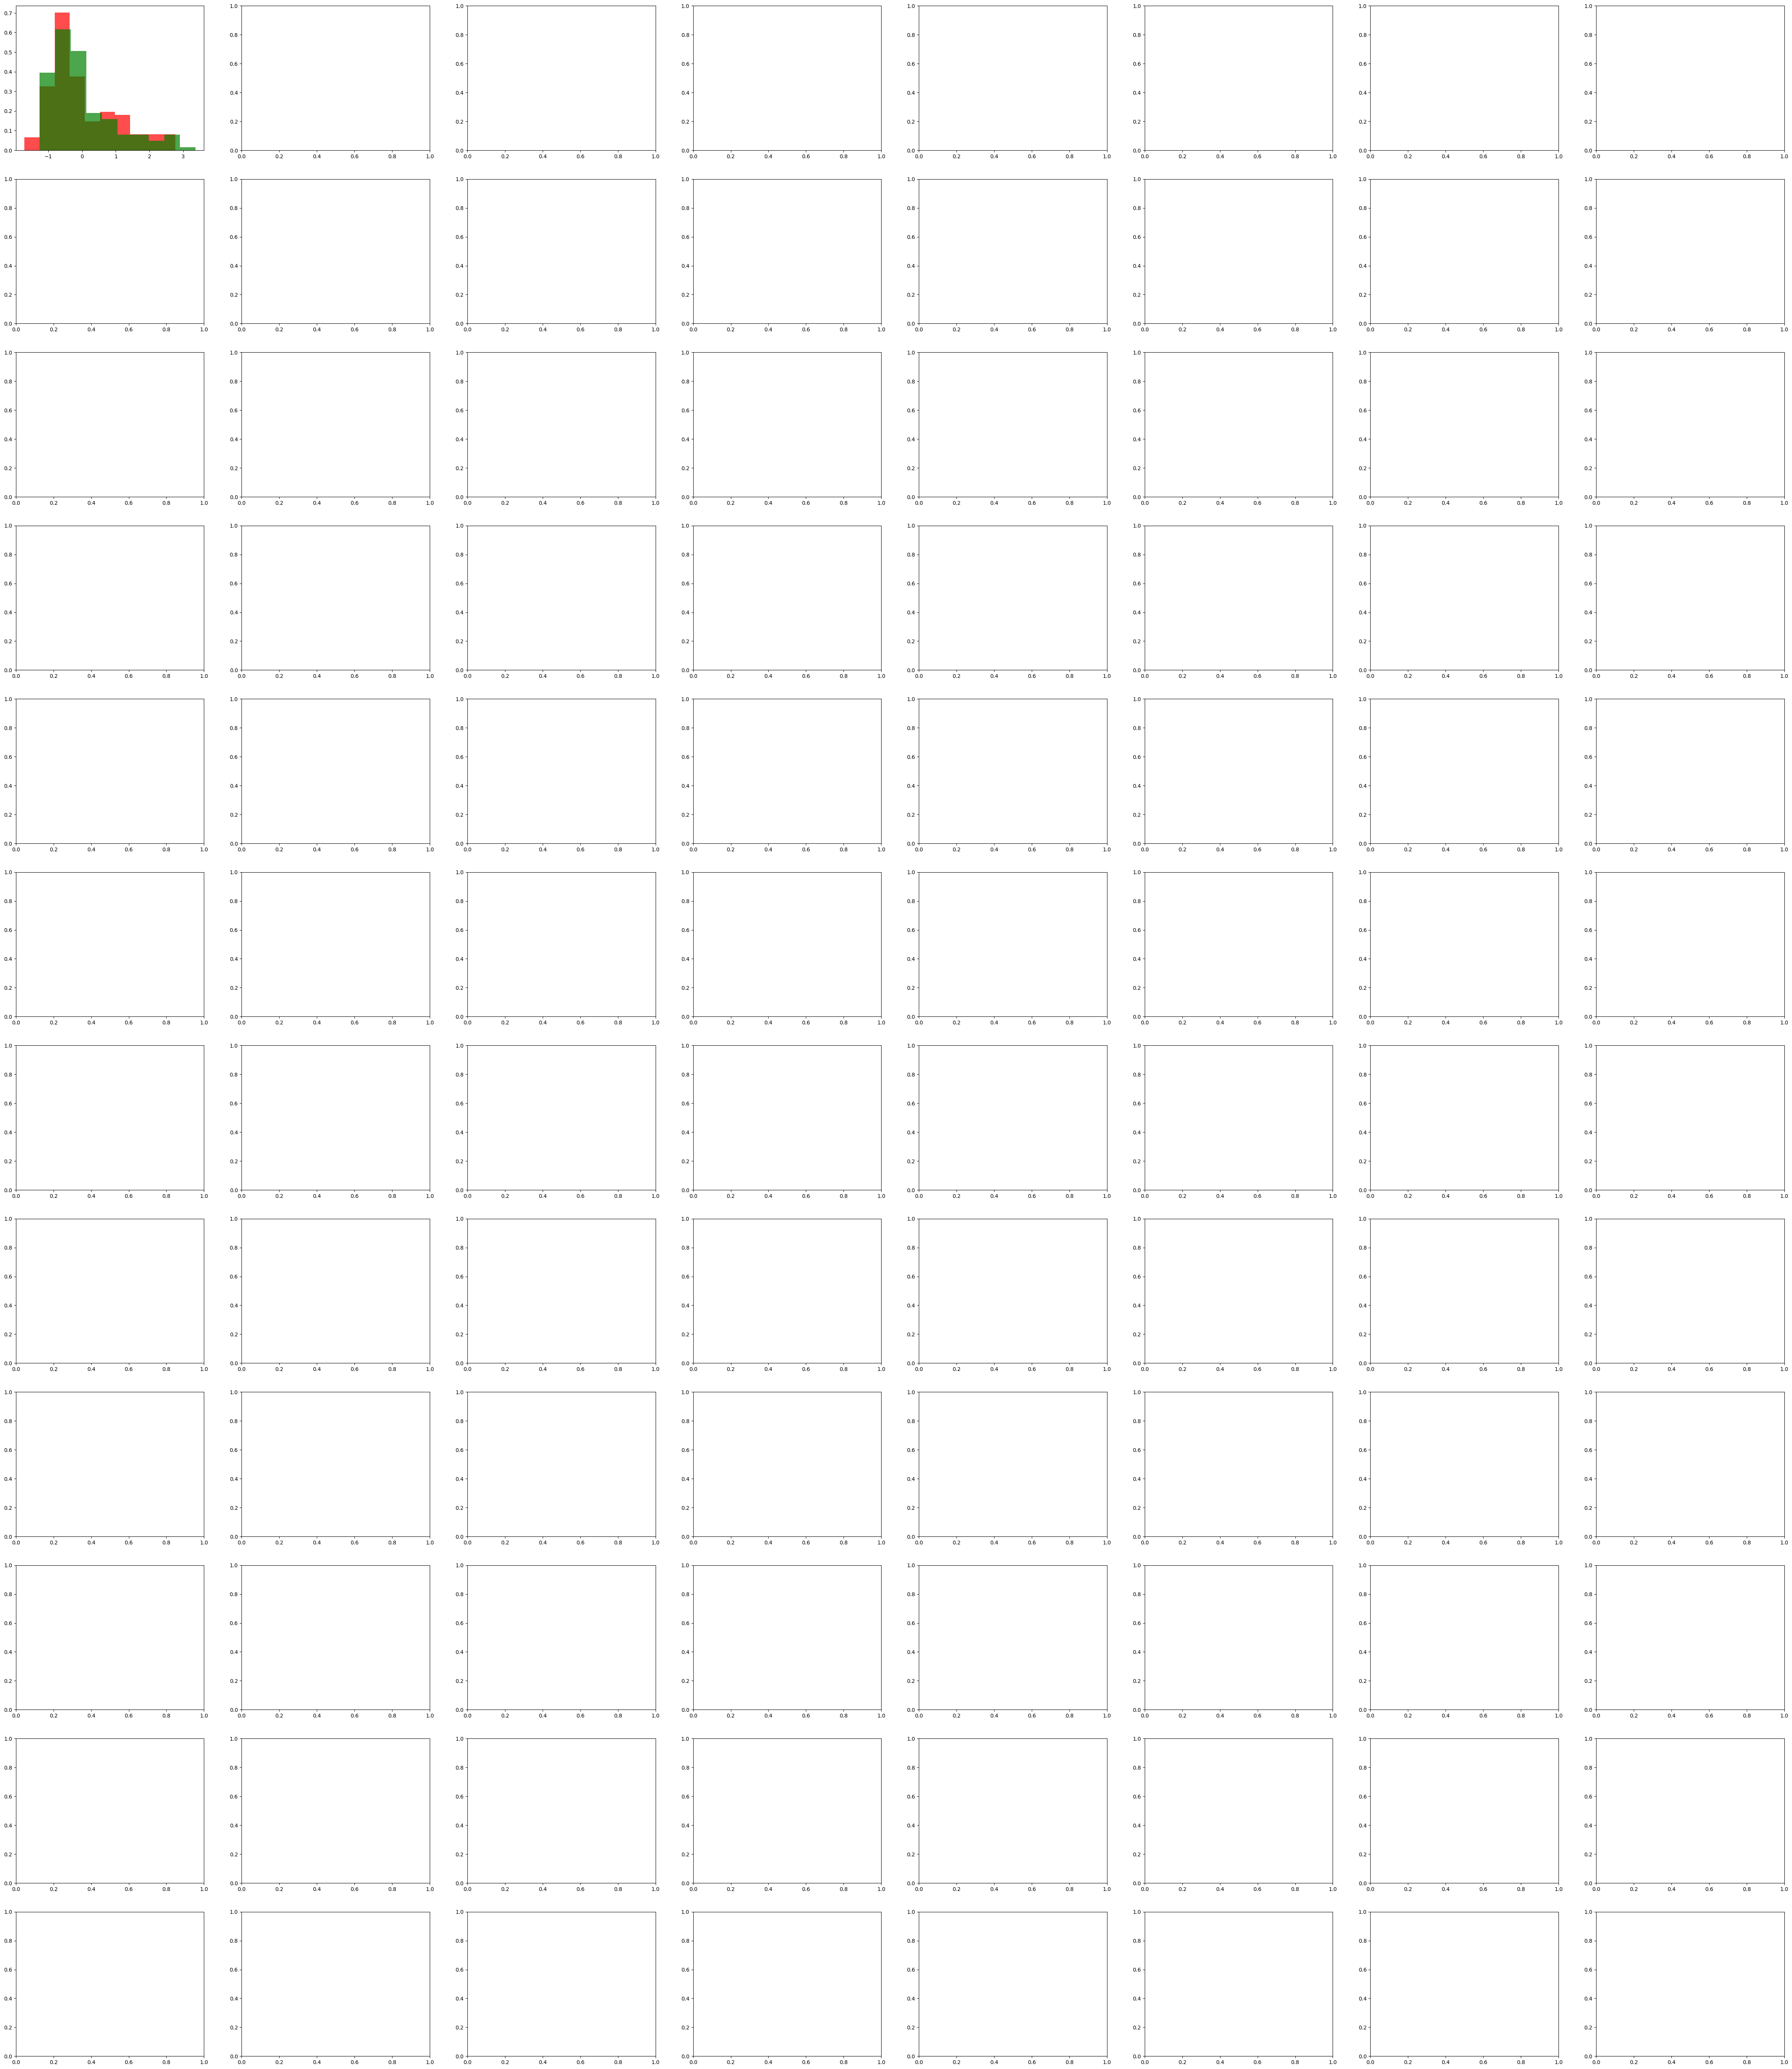

In [17]:
# Define the PDF function
def pdf(data, color):
    mu, std = norm.fit(data)
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    c_ax.plot(x, p, color=color, linewidth=2)

fig, m_axs = plt.subplots(12, 8, figsize=(60, 70))
for c_ax, c_var in zip(m_axs.flatten(), feature_names):
    dl_data = DL_df[c_var].values
    hc_data = HC_df[c_var].values

    # Plot histograms
    c_ax.hist(dl_data, bins=10, alpha=0.7, color='red', density=True)
    c_ax.hist(hc_data, bins=10, alpha=0.7, color='green', density=True)

    # Plot PDF curves
    pdf(dl_data, color='blue')
    pdf(hc_data, color='purple')

    c_ax.set_title('\n'.join(c_var.split(' ')))

plt.tight_layout()
plt.show()

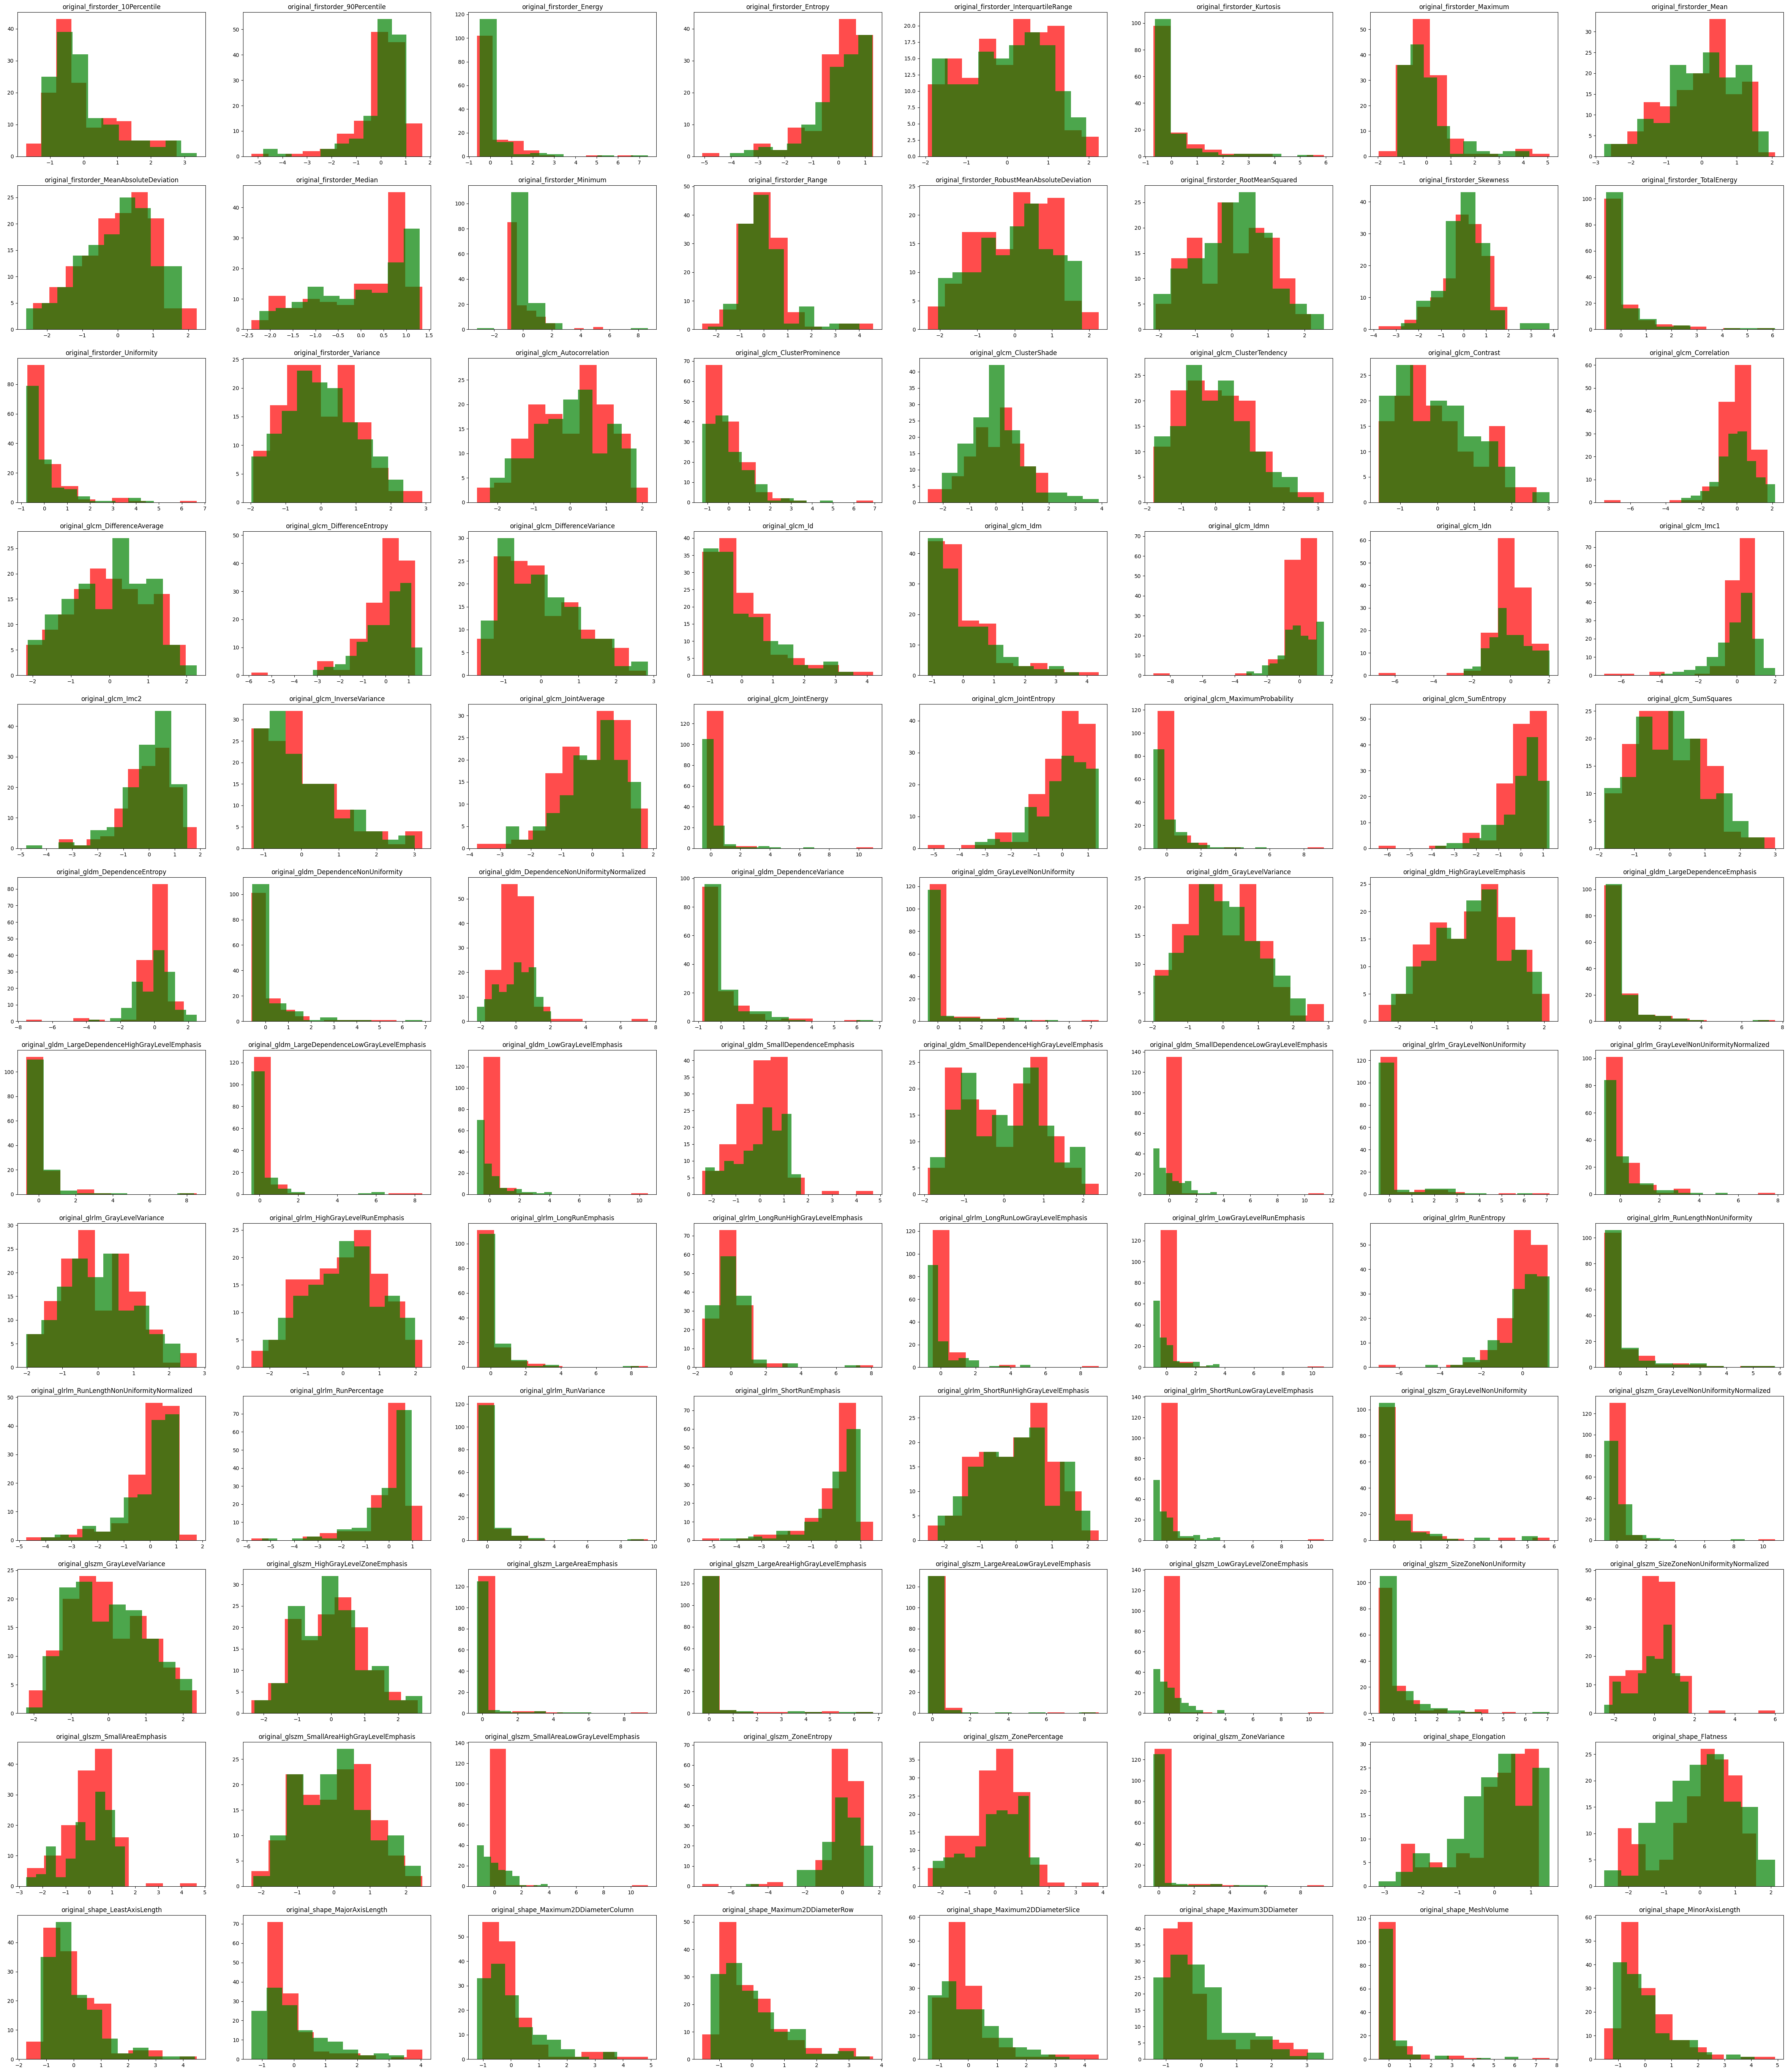

In [19]:
fig, m_axs = plt.subplots(12, 8, figsize=(60, 70))
for c_ax, c_var in zip(m_axs.flatten(), feature_names):
    c_ax.hist(DL_df[c_var].values, bins=10,alpha=.7, color='red')
    c_ax.hist(HC_df[c_var].values, bins=10,alpha=.7, color='green')
    c_ax.set_title('\n'.join(c_var.split(' ')))

# Distributions

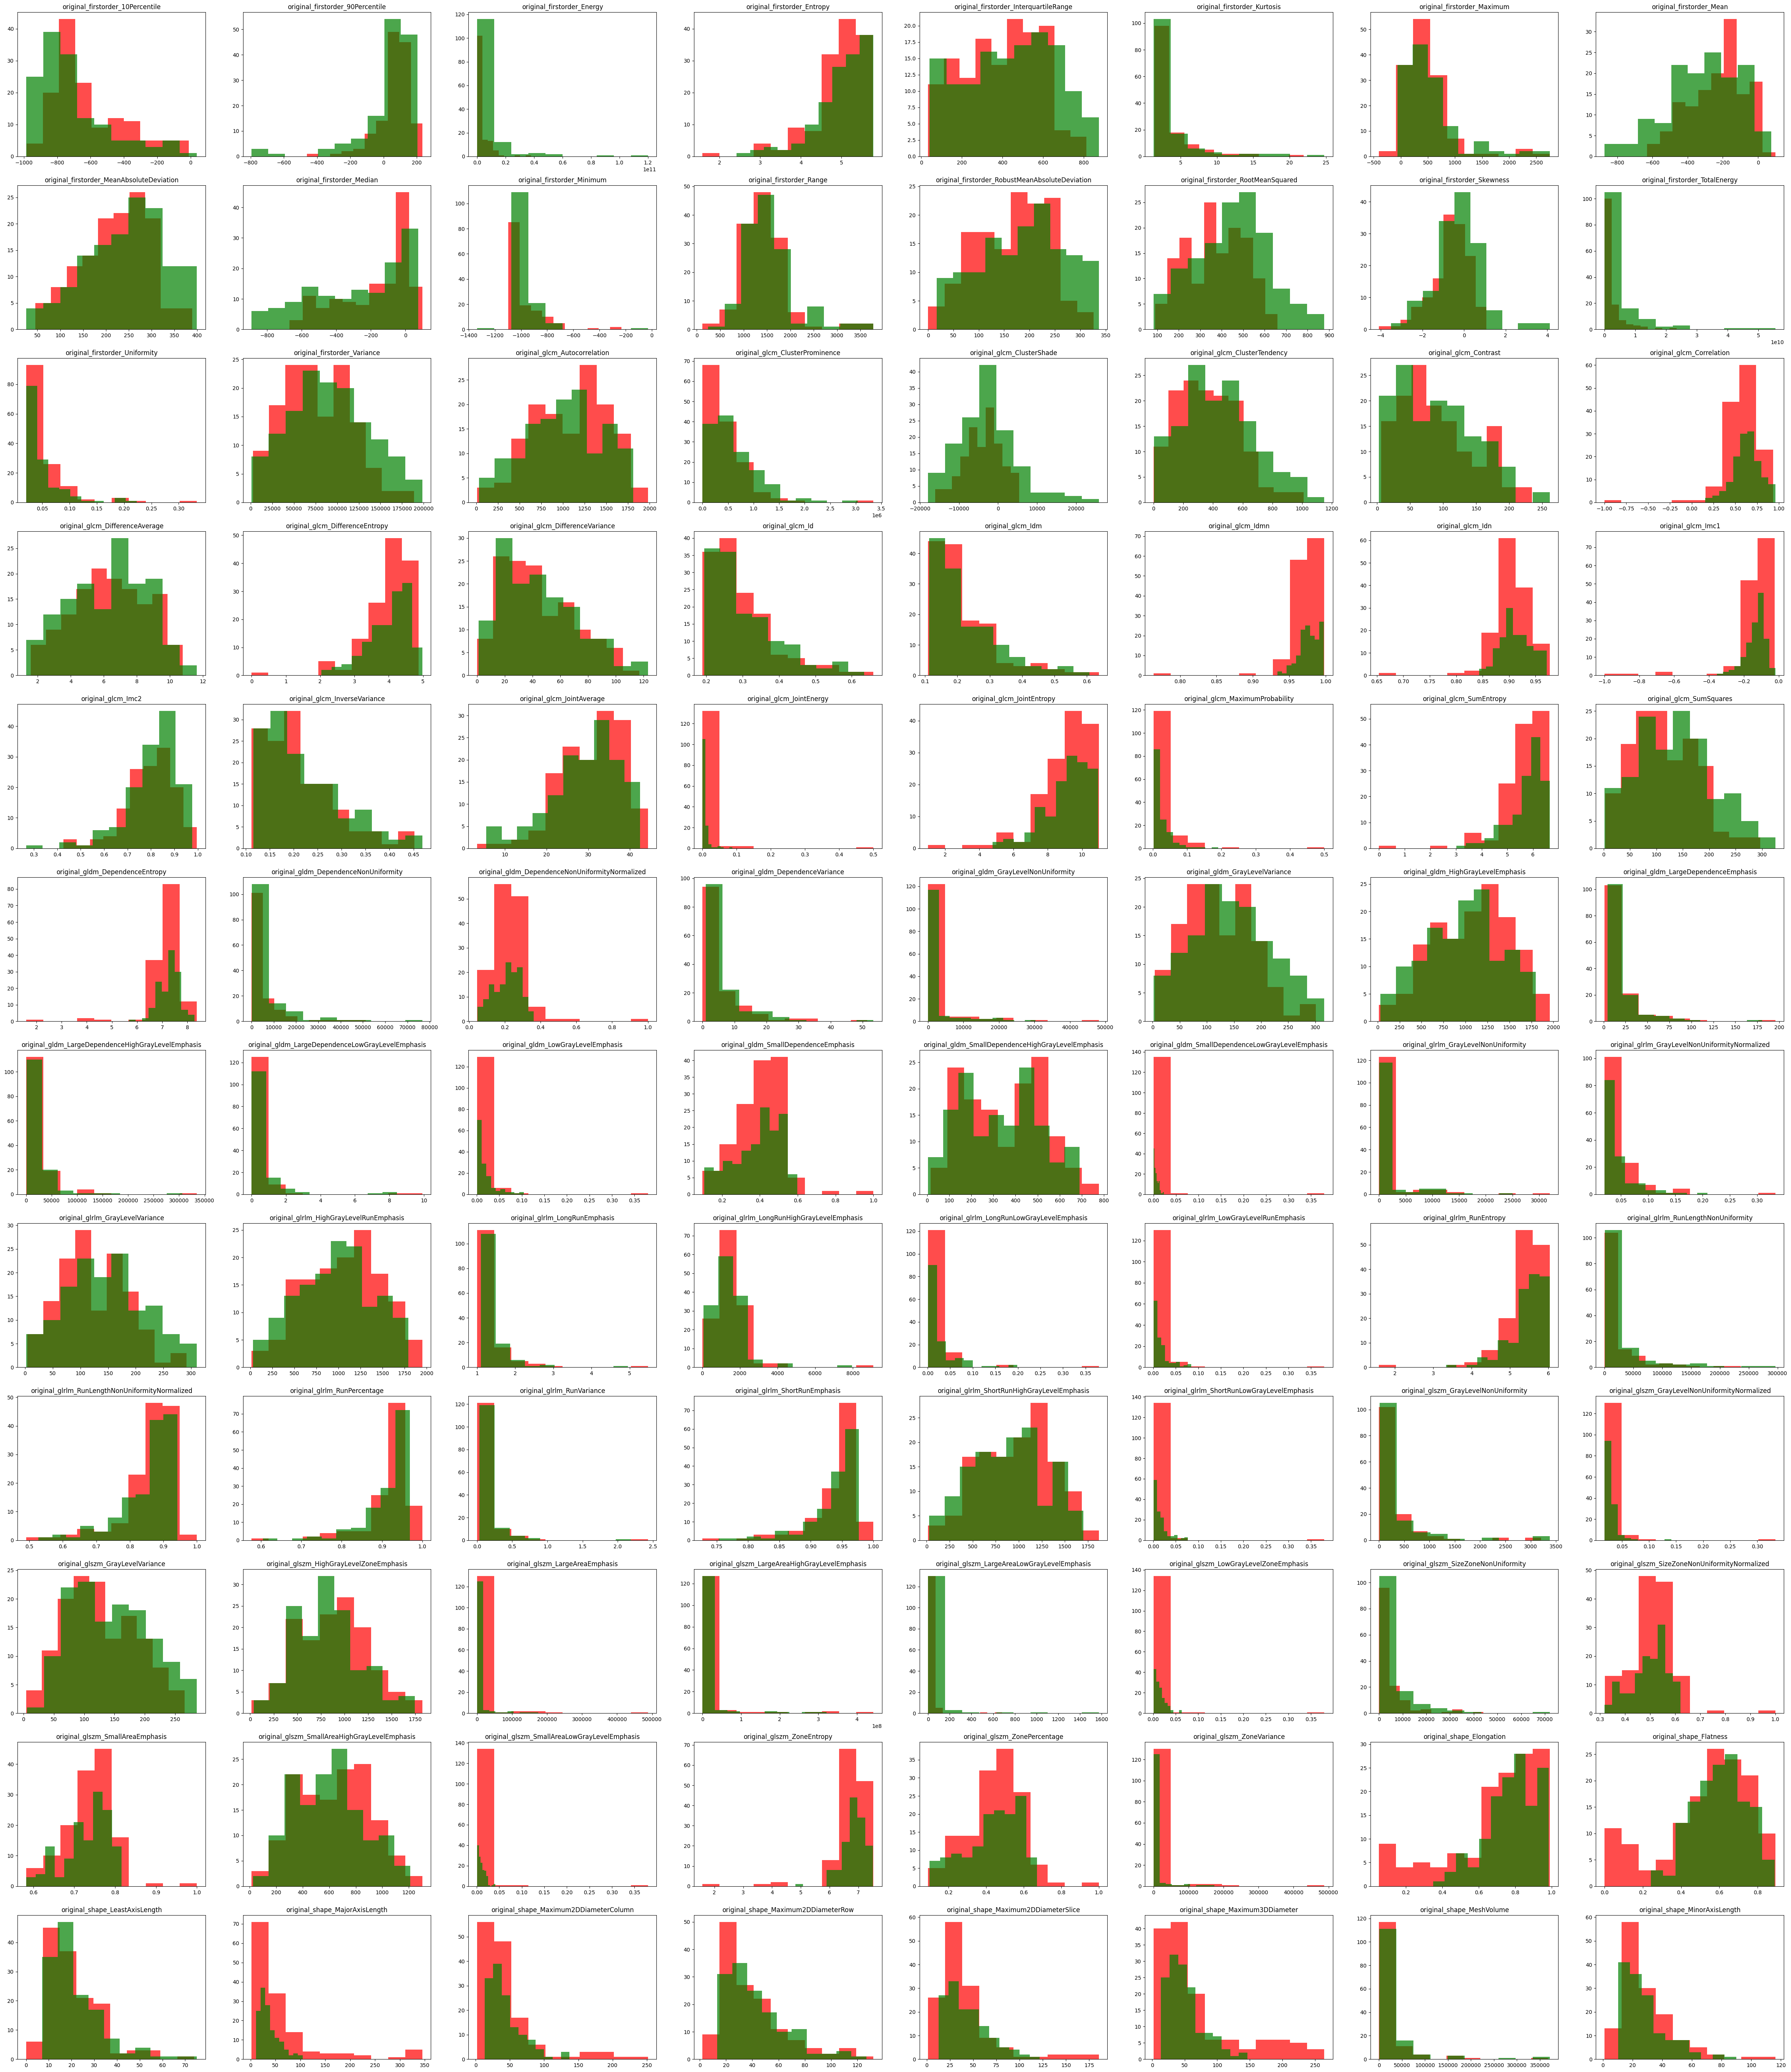

In [ ]:
fig, m_axs = plt.subplots(12, 8, figsize=(60, 70))
for c_ax, c_var in zip(m_axs.flatten(), feature_names):
    c_ax.hist(DL_features[c_var].values, bins=10,alpha=.7, color='red')
    c_ax.hist(HC_features[c_var].values, bins=10,alpha=.7, color='green')
    c_ax.set_title('\n'.join(c_var.split(' ')))

# Kolmogorov-Smirnov Test

> High p-value indicates that the sample distribution is very similar to the reference distribution, and there is no significant evidence to reject the null hypothesis.

> Low p-value indicates that the sample distribution different to the reference distribution, and they significant evidence to accept the null hypothesis.

In [20]:
import scipy.stats as stats
KSS = []
pvalue = []
# Generate example data
data1 = DL_features.values
data2 = HC_features.values

# Perform the Kolmogorov-Smirnov test
for i,feature in enumerate(feature_names):
    statistic, p_value = stats.ks_2samp(data1[i], data2[i])
    KSS.append(statistic)
    pvalue.append(p_value)
    # Print the test results
    print(f"Feature namme: {feature}")
    print(f"Kolmogorov-Smirnov statistic: {statistic}")
    print(f"P-value: {p_value}")

p_val_dict = {}
kss_dict = {}
for i,f in enumerate(feature_names):
    p_val_dict[f] = pvalue[i]
    kss_dict[f] = KSS[i]

Feature namme: original_firstorder_10Percentile
Kolmogorov-Smirnov statistic: 0.05
P-value: 0.9996892272702655
Feature namme: original_firstorder_90Percentile
Kolmogorov-Smirnov statistic: 0.04
P-value: 0.999998821968263
Feature namme: original_firstorder_Energy
Kolmogorov-Smirnov statistic: 0.08
P-value: 0.9084105017744525
Feature namme: original_firstorder_Entropy
Kolmogorov-Smirnov statistic: 0.06
P-value: 0.9942356257694902
Feature namme: original_firstorder_InterquartileRange
Kolmogorov-Smirnov statistic: 0.02
P-value: 0.9999999999999999
Feature namme: original_firstorder_Kurtosis
Kolmogorov-Smirnov statistic: 0.04
P-value: 0.999998821968263
Feature namme: original_firstorder_Maximum
Kolmogorov-Smirnov statistic: 0.07
P-value: 0.9684099261397212
Feature namme: original_firstorder_Mean
Kolmogorov-Smirnov statistic: 0.14
P-value: 0.2819416298082479
Feature namme: original_firstorder_MeanAbsoluteDeviation
Kolmogorov-Smirnov statistic: 0.05
P-value: 0.9996892272702655
Feature namme: o

## P Value

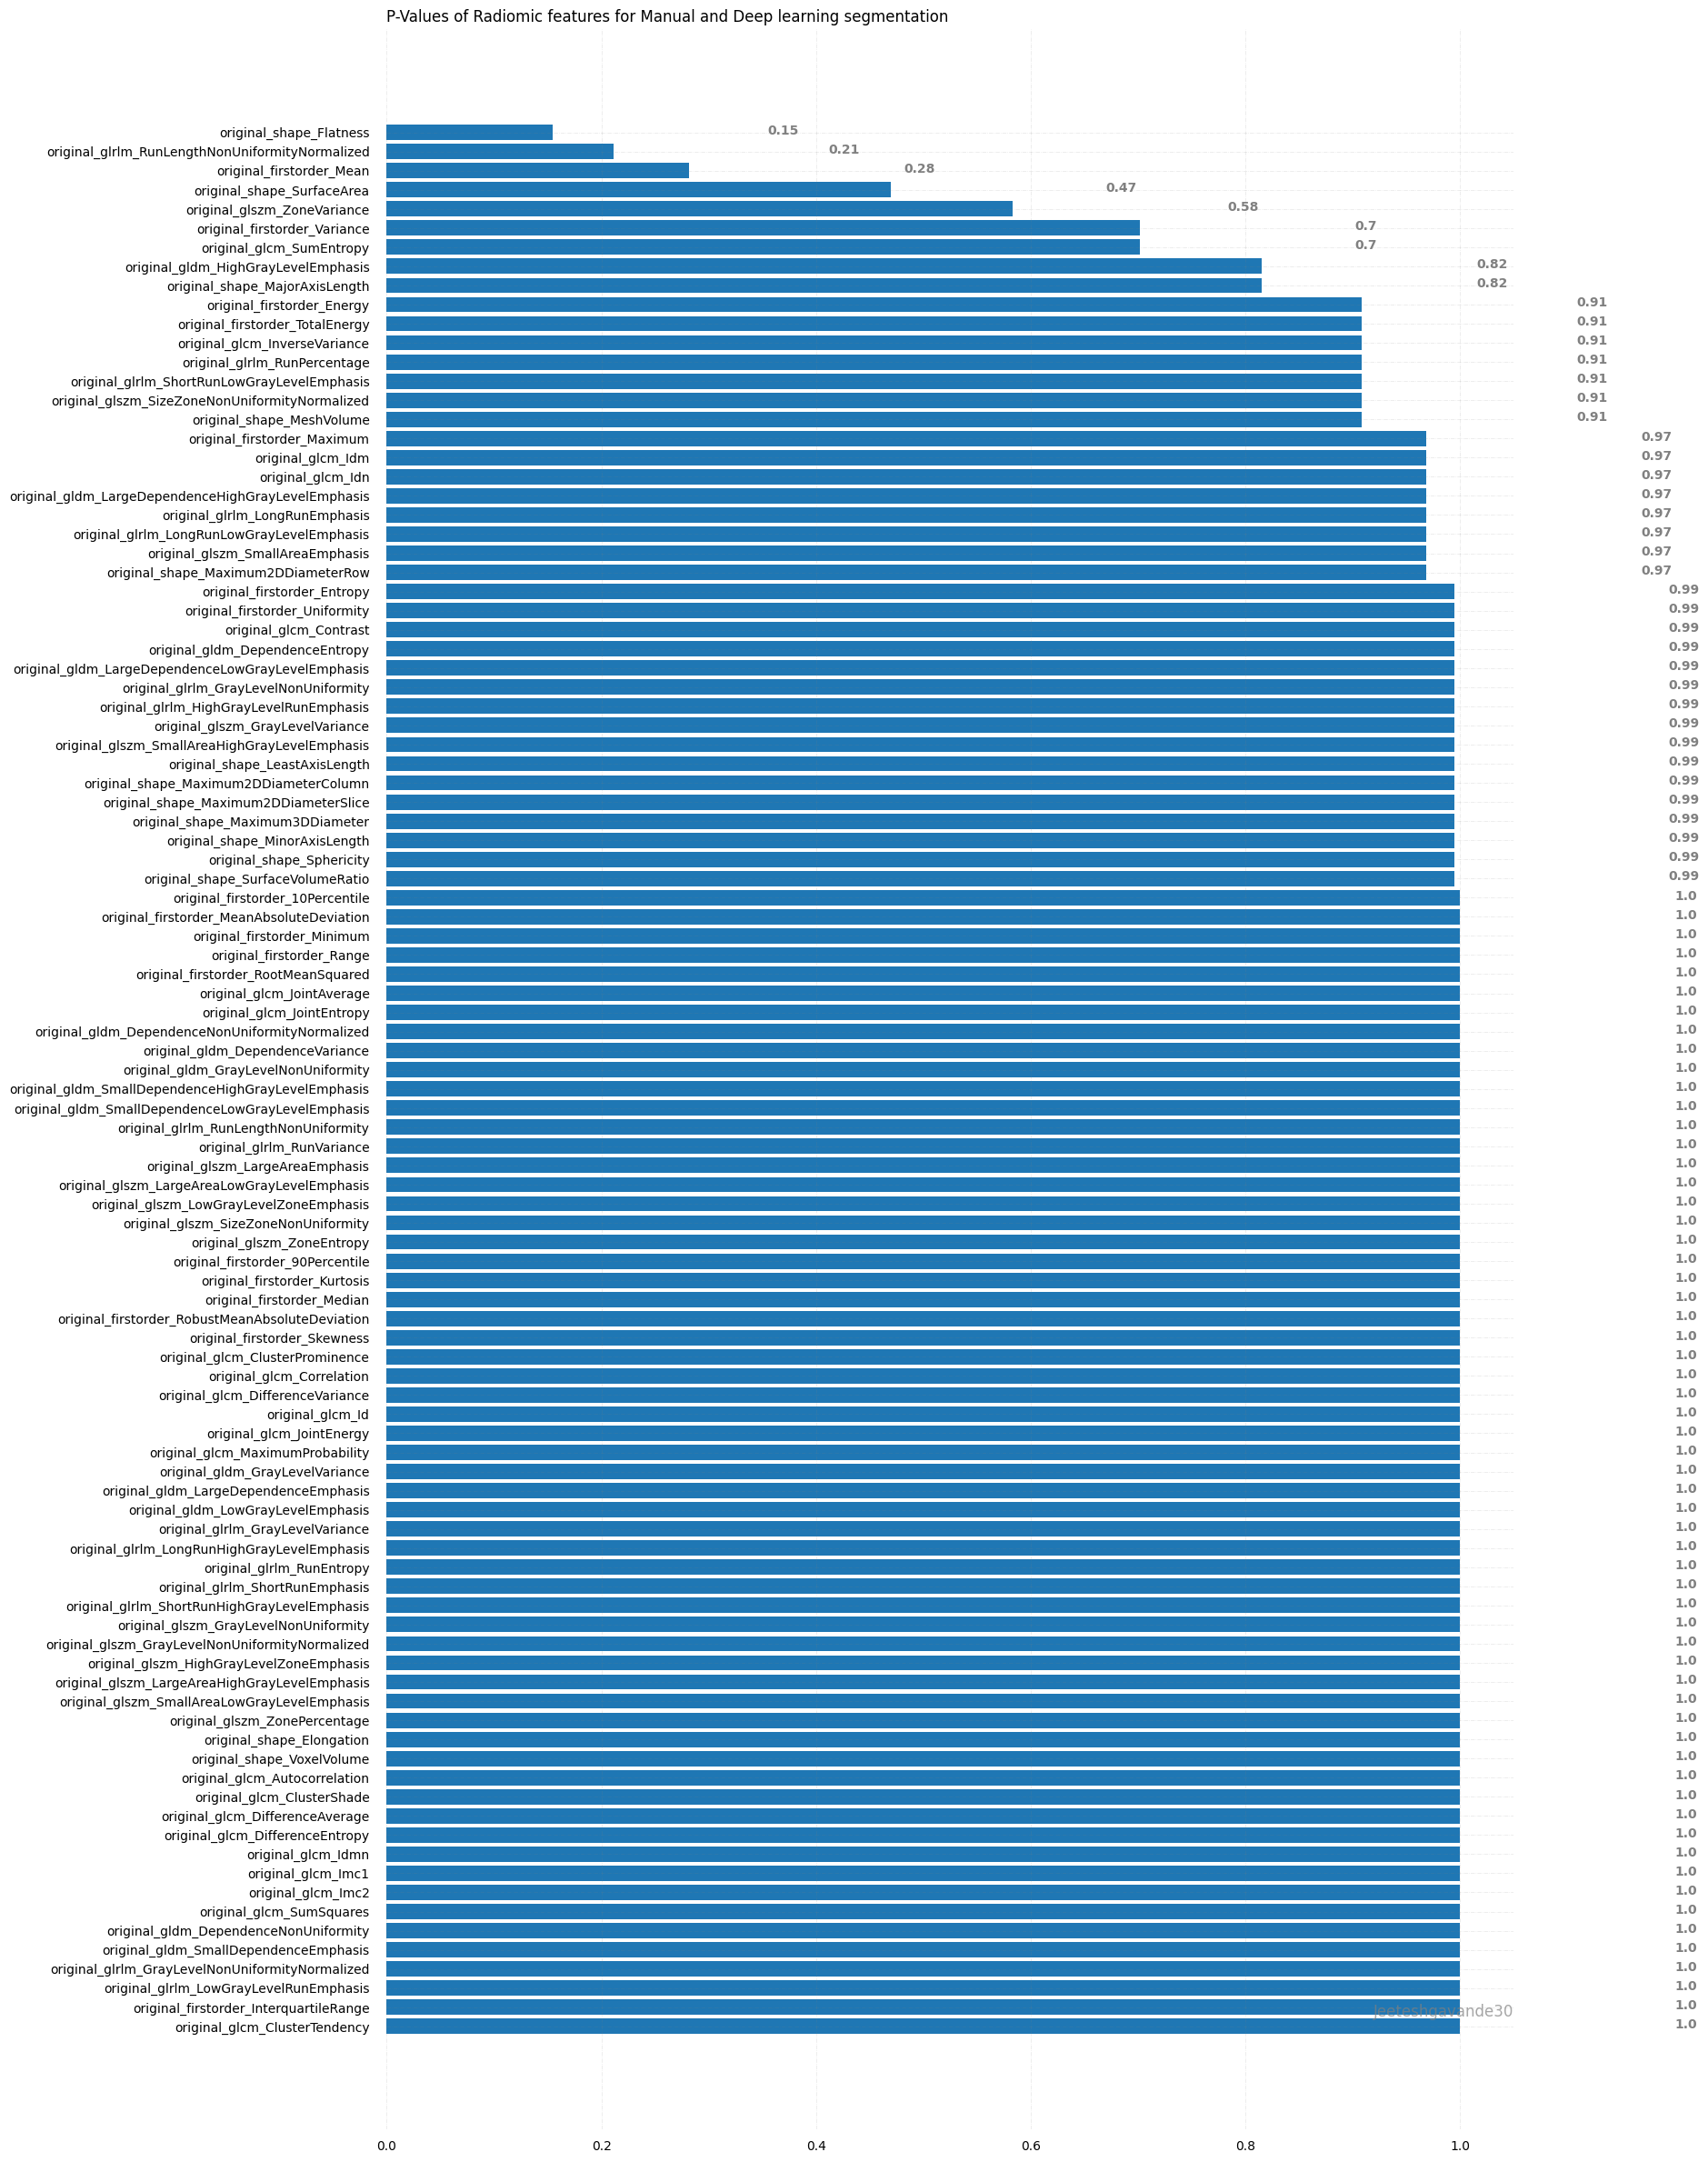

In [21]:
import pandas as pd
from matplotlib import pyplot as plt
 
# creating the dataset

data = dict(sorted(p_val_dict.items(), key=lambda item: item[1]))
feat = list(data.keys())
values = list(data.values())
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 30))
 
# Horizontal Bar Plot
ax.barh(feat, values)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('P-Values of Radiomic features for Manual and Deep learning segmentation',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

High KS Statistic: A high KS statistic indicates a larger difference between the sample distribution and the reference distribution. This suggests that the two distributions are not very similar. In other words, if the KS statistic is high, it suggests that the sample does not follow the reference distribution closely.


Low KS Statistic: A low KS statistic indicates a smaller difference between the sample distribution and the reference distribution. This suggests that the two distributions are more similar. If the KS statistic is low, it implies that the sample distribution follows the reference distribution relatively closely.


In summary, a high KS statistic suggests that the sample distribution and the reference distribution differ significantly, while a low KS statistic suggests that they are more similar. The p-value associated with the KS statistic provides additional information about the strength of evidence against the null hypothesis that the sample distribution follows the reference distribution. A high p-value suggests that the two distributions are consistent, while a low p-value suggests evidence of a significant difference.

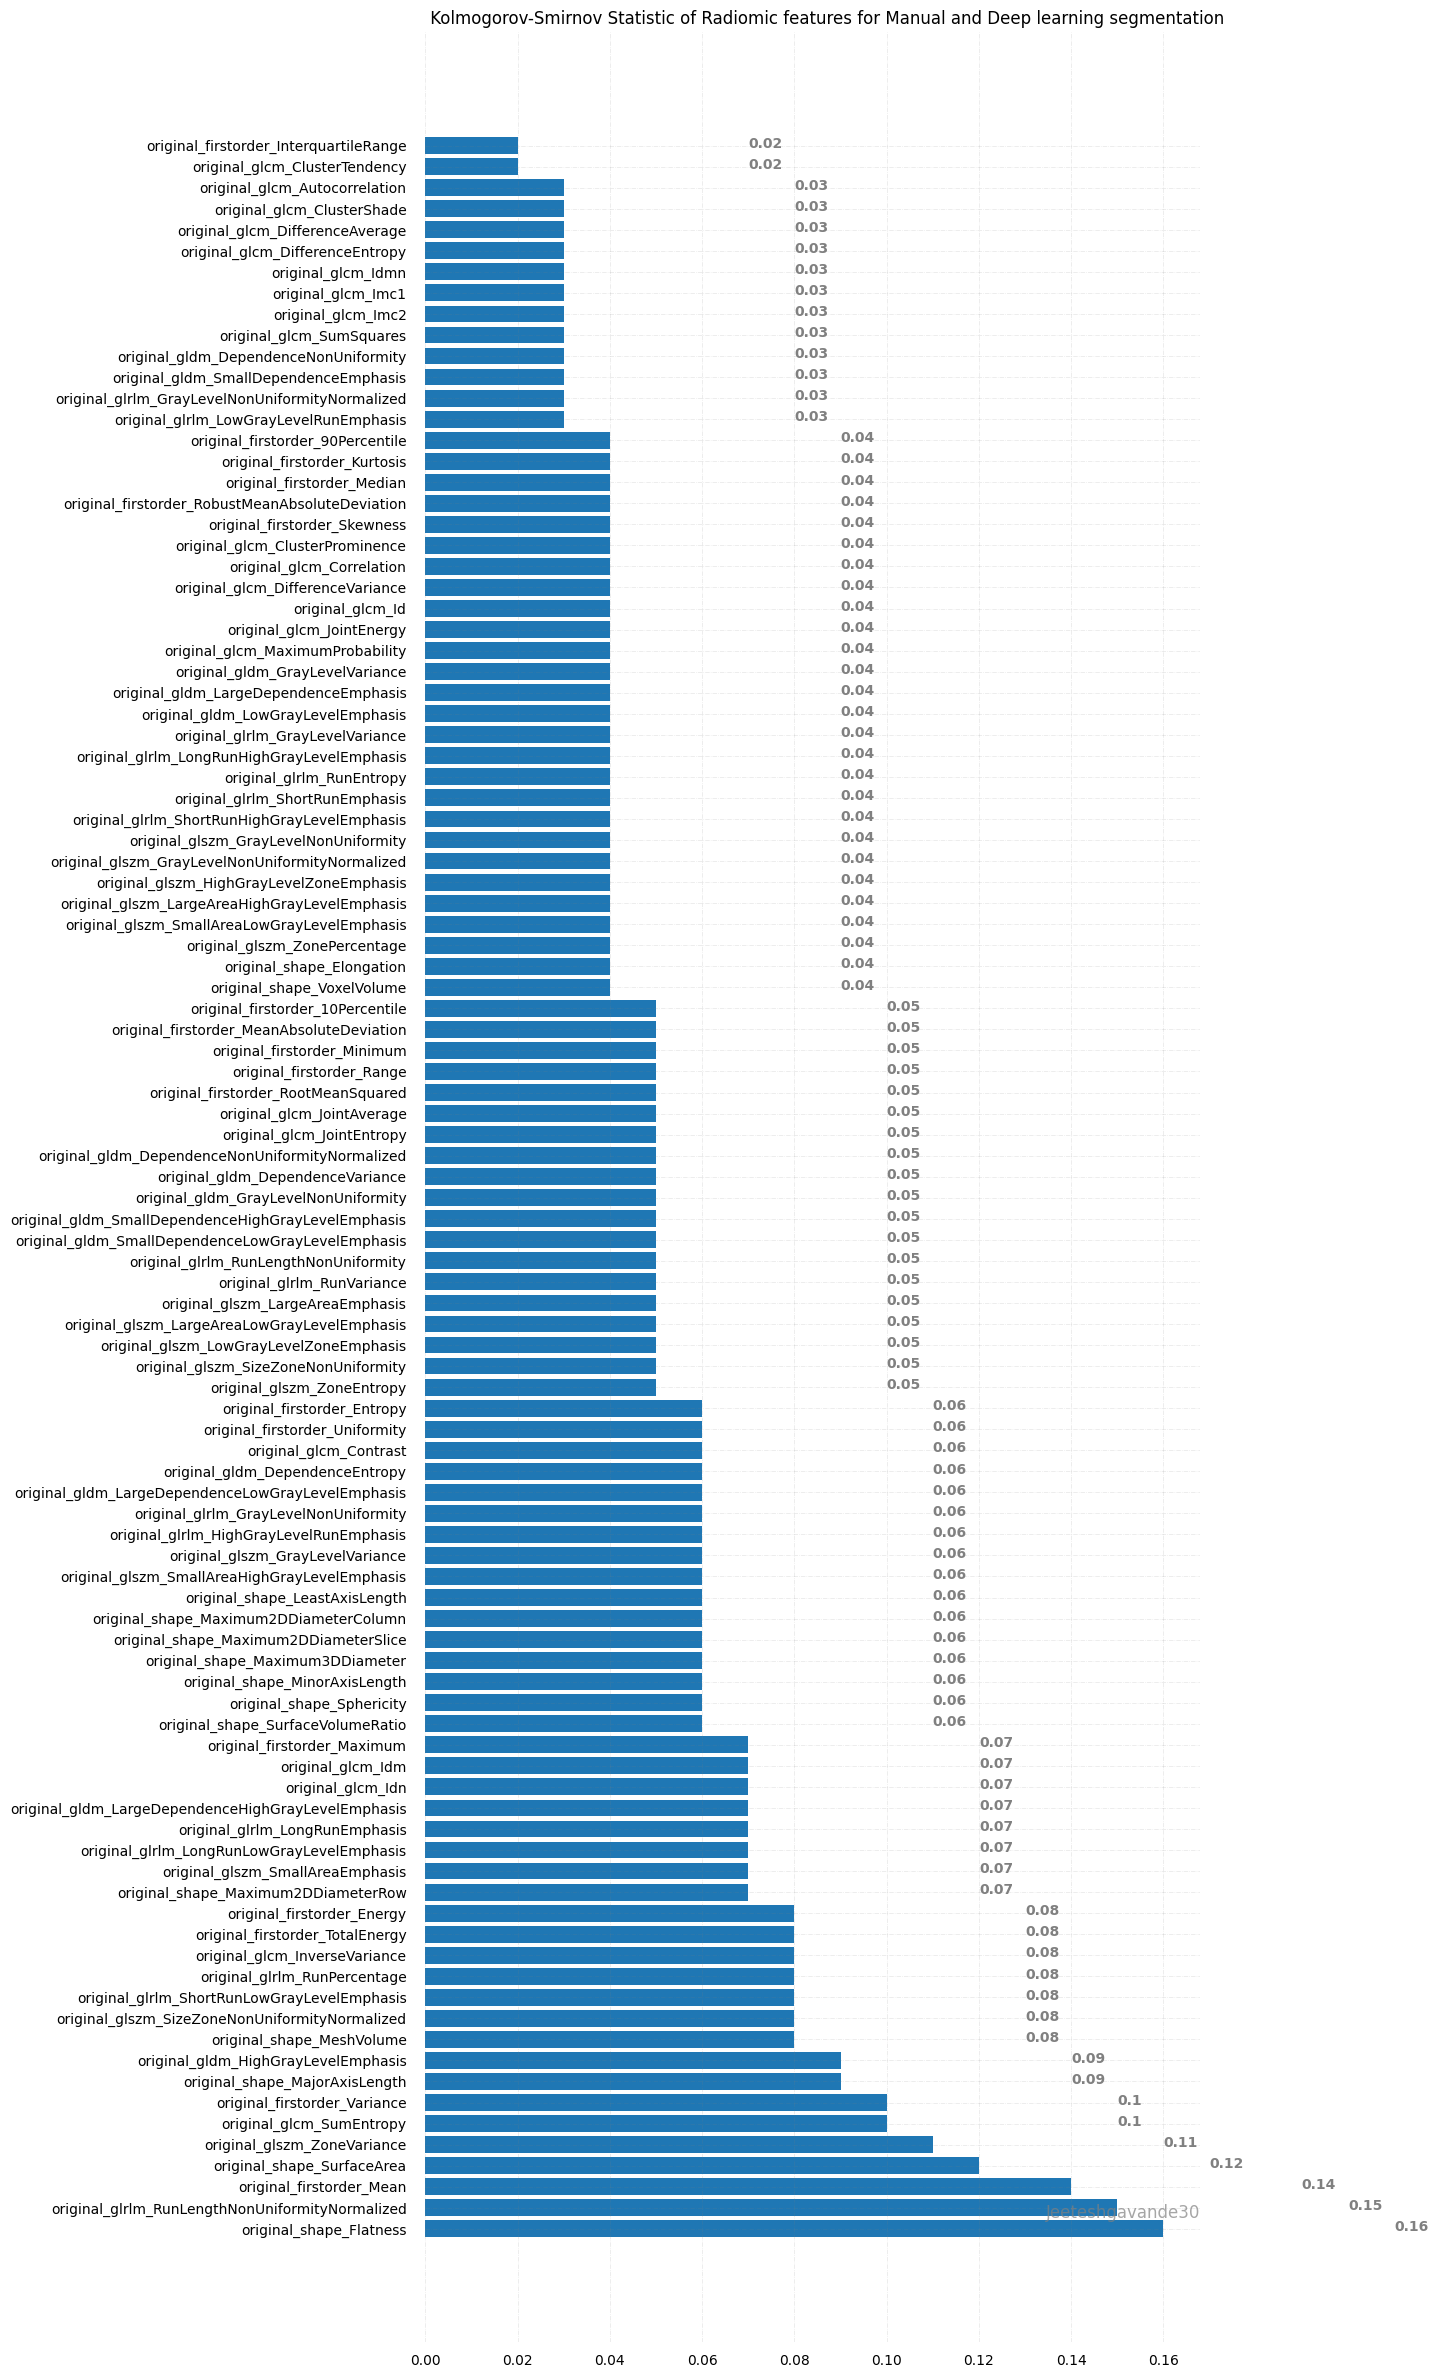

In [22]:
import pandas as pd
from matplotlib import pyplot as plt
 
# creating the dataset

data = dict(sorted(kss_dict.items(), key=lambda item: item[1]))
feat = list(data.keys())
values = list(data.values())
 
# Figure Size
fig, ax = plt.subplots(figsize =(10, 30))
 
# Horizontal Bar Plot
ax.barh(feat, values)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.05, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title(' Kolmogorov-Smirnov Statistic of Radiomic features for Manual and Deep learning segmentation',
             loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

# Overlaying heatmaps

In [23]:
DL_features.head()

original_firstorder_10Percentile  original_firstorder_90Percentile   
0                            -413.4                              41.4  \
1                            -490.2                              35.2   
2                            -696.0                              91.0   
3                            -468.0                             148.0   
4                            -185.0                              51.0   

   original_firstorder_Energy  original_firstorder_Entropy   
0                 130070436.0                     4.410179  \
1                 150947401.0                     4.437764   
2                 348247288.0                     5.154500   
3                  91238553.0                     4.813751   
4                 232763530.0                     3.444492   

   original_firstorder_InterquartileRange  original_firstorder_Kurtosis   
0                                   266.0                      2.699818  \
1                                   272.0                      3.250647   
2                                   483.5                      2.249295   
3                                   245.5                      3.935420   
4                                    63.0                      8.834677   

   original_firstorder_Maximum  original_firstorder_Mean   
0                        154.0               -128.563454  \
1                        144.0               -143.467708   
2                        376.0               -205.738462   
3                        366.0                -66.283355   
4                        391.0                -30.961731   

   original_firstorder_MeanAbsoluteDeviation  original_firstorder_Median  ...   
0                                 151.411842                       -52.0  ...  \
1                                 171.835955                       -43.0  ...   
2                                 263.471680                       -70.0  ...   
3                                 184.393689                        20.5  ...   
4                                  75.040214                         5.0  ...   

   original_shape_Maximum2DDiameterColumn   
0                               20.225596  \
1                               18.942735   
2                               18.750000   
3                               18.463442   
4                               30.048484   

   original_shape_Maximum2DDiameterRow  original_shape_Maximum2DDiameterSlice   
0                            19.289239                              16.245930  \
1                            23.160640                              18.695283   
2                            22.134620                              22.284121   
3                            23.953263                              17.469316   
4                            26.810640                              32.878011   

   original_shape_Maximum3DDiameter  original_shape_MeshVolume   
0                         21.854621                1280.890882  \
1                         23.316946                2371.207052   
2                        136.411172                2821.243286   
3                         24.181221                1279.143117   
4                         33.741659                7320.674439   

   original_shape_MinorAxisLength  original_shape_Sphericity   
0                       12.654804                   0.751804  \
1                       13.733378                   0.806066   
2                       17.309452                   0.647101   
3                       13.320753                   0.665884   
4                       21.409842                   0.760517   

   original_shape_SurfaceArea  original_shape_SurfaceVolumeRatio   
0                  758.672235                           0.592300  \
1                 1066.824712                           0.449908   
2                 1492.127602                           0.528890   
3                  855.785380                           0.669030   
4           

<Figure size 1500x1000 with 0 Axes>

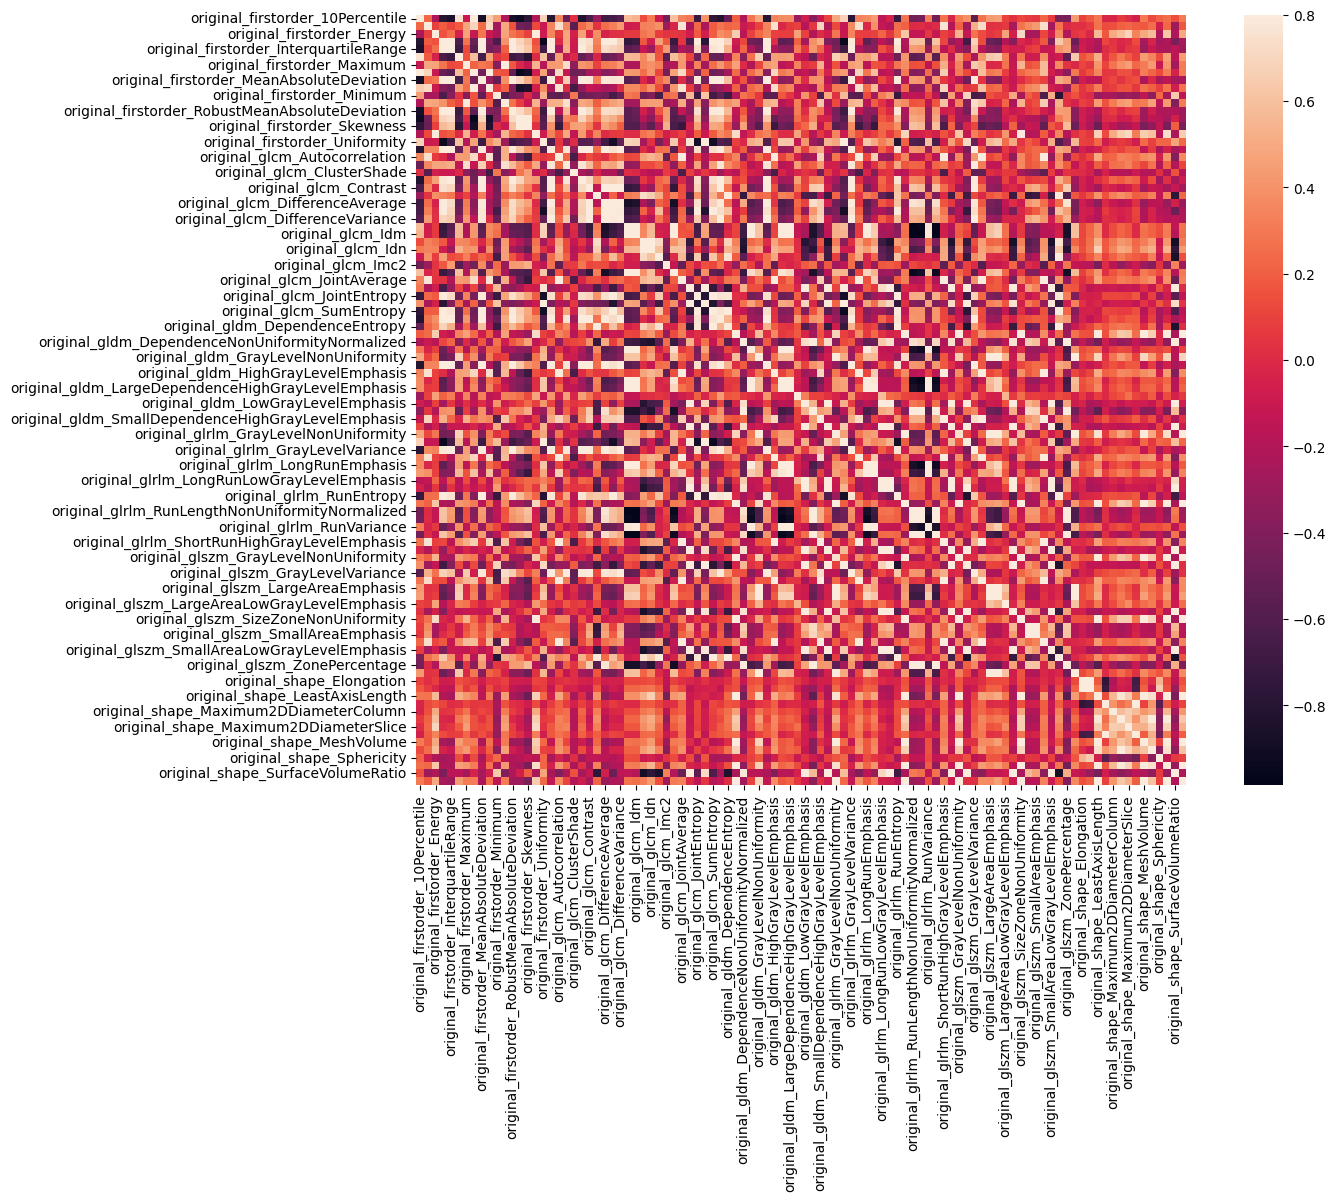

In [24]:
plt.figure(figsize=(15,10))
correlations = DL_features.corr()

# Set up the matplotlib figure, make it big!
f, ax = plt.subplots(figsize=(15, 10))

# Draw the heatmap using seaborn
sns.heatmap(correlations, vmax=.8, square=True)
plt.show()

/home/hrehman/radiomics_venv/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/hrehman/radiomics_venv/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


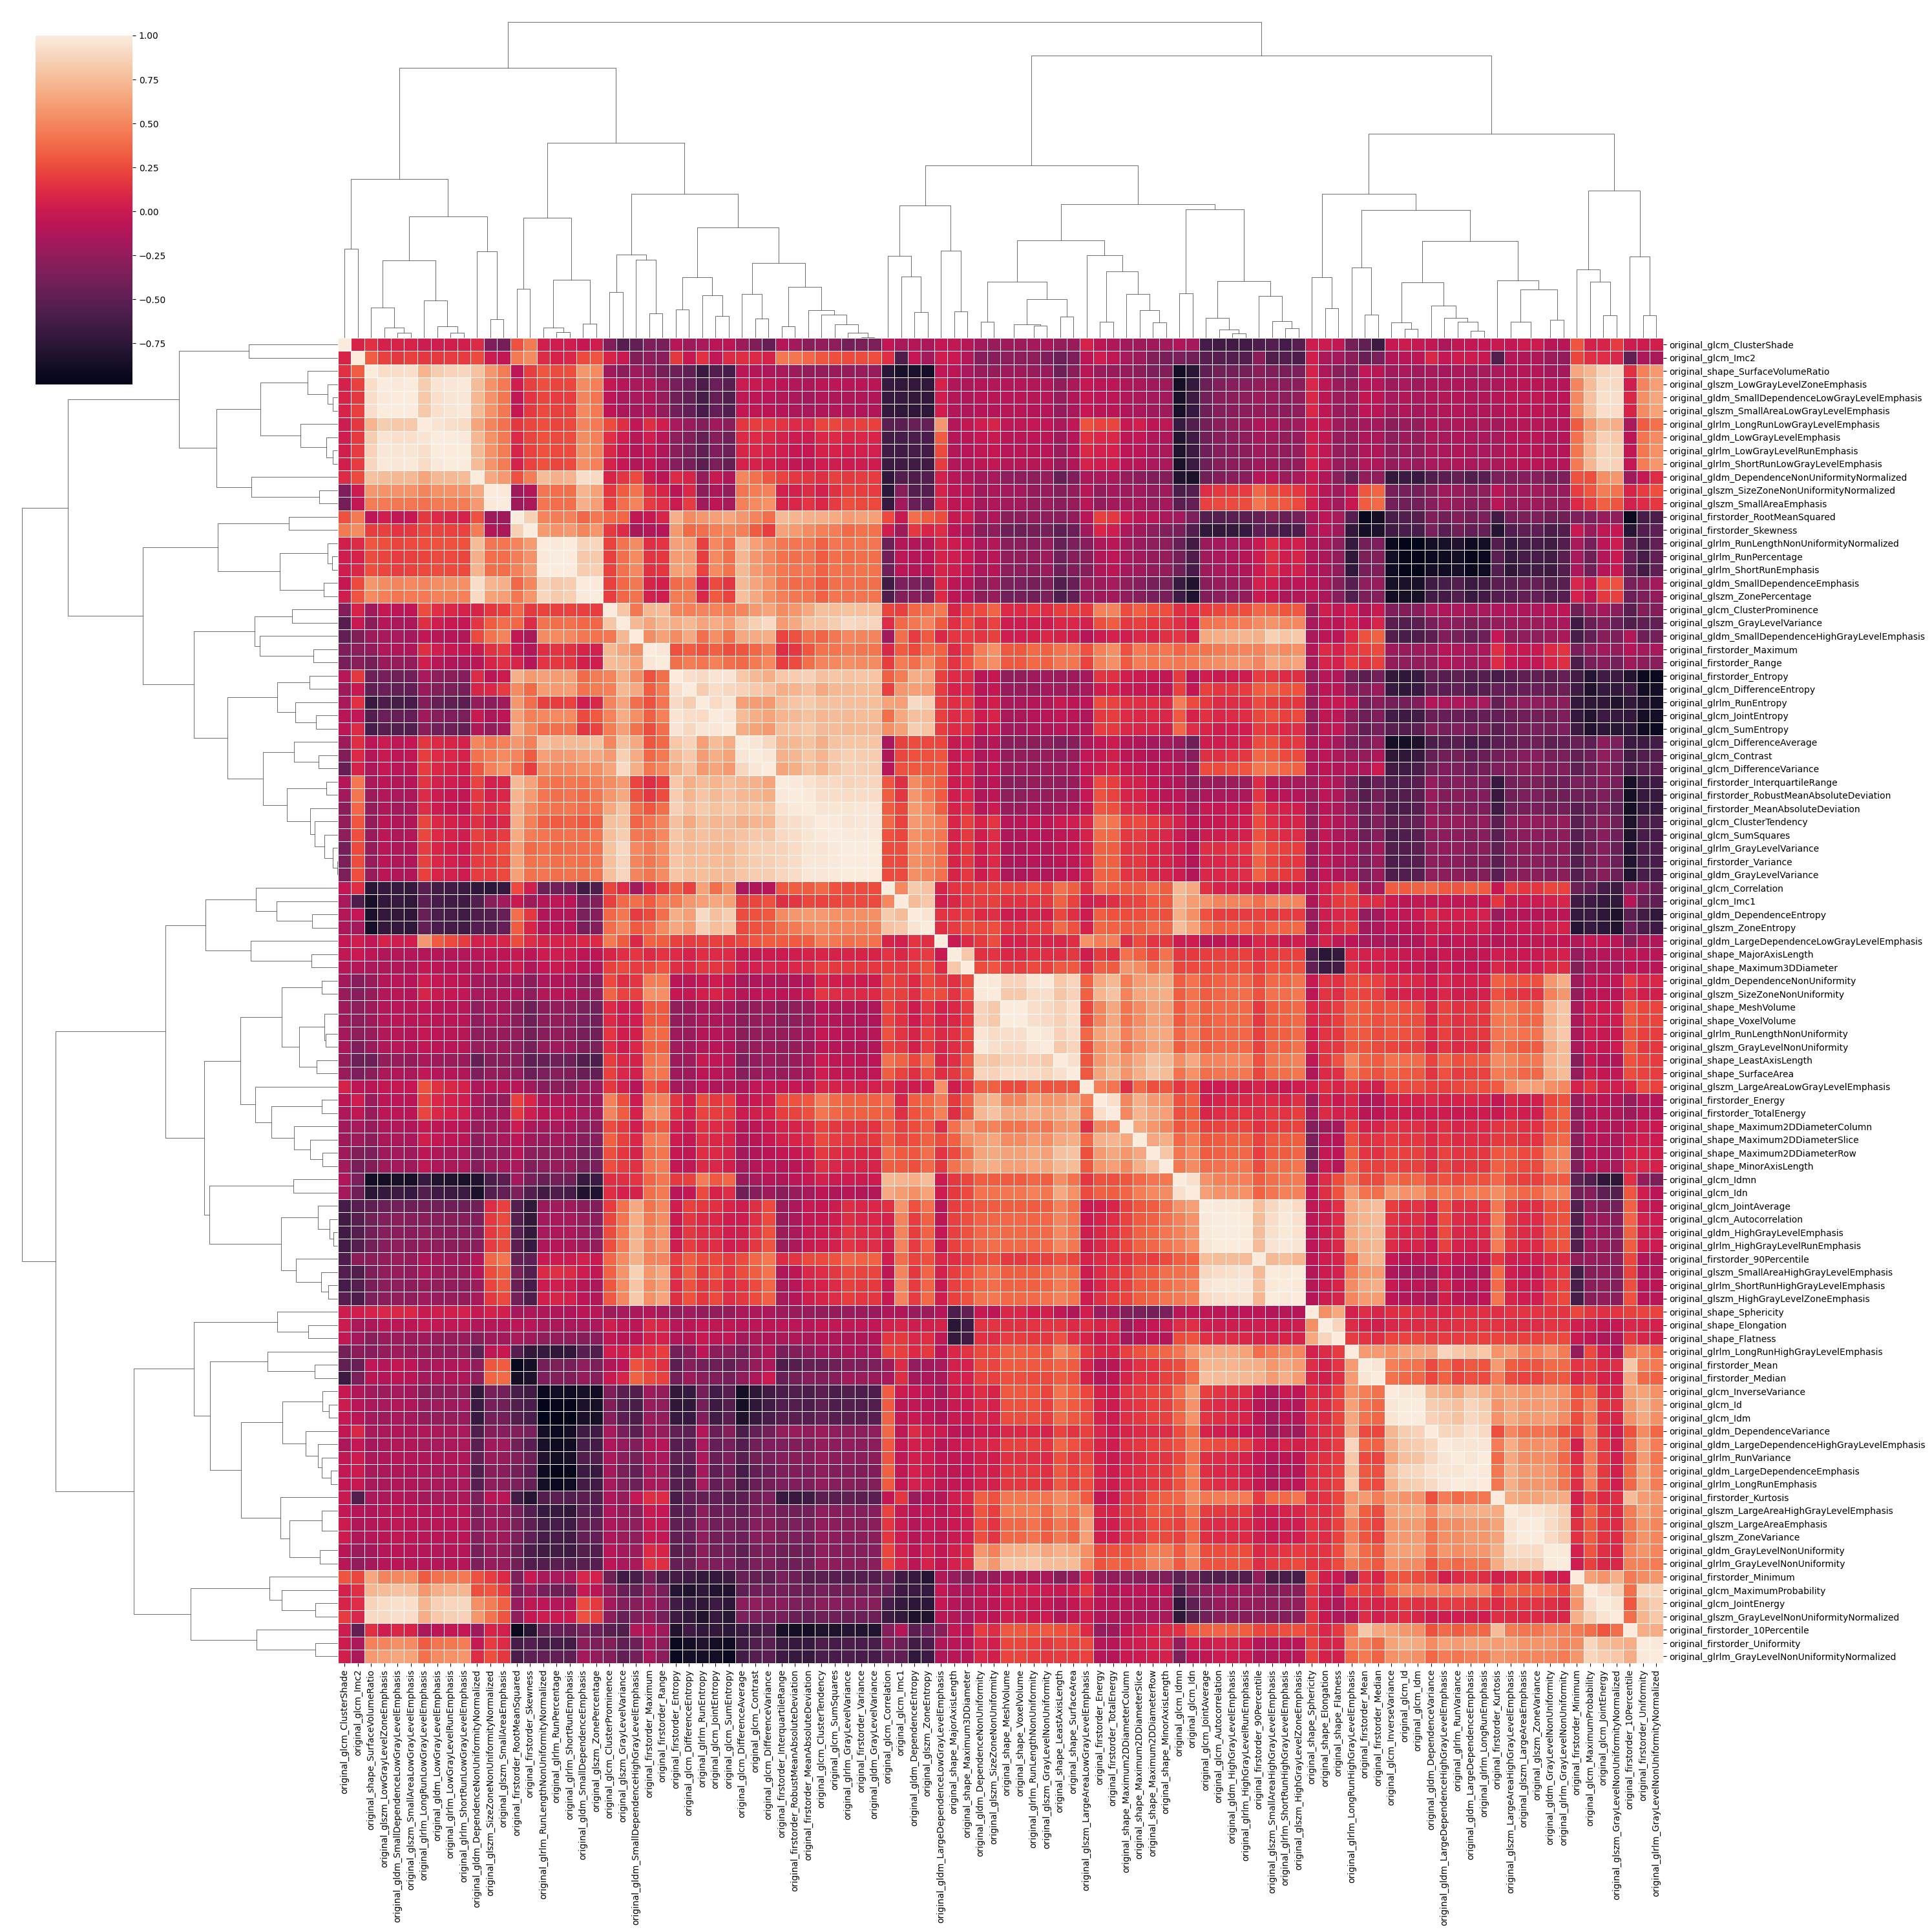

In [25]:
# Choose a subset of features for clustering


pp = sns.clustermap(correlations, linewidths=.5, figsize=(30,30),method="complete")
_ = plt.setp(pp.ax_heatmap.get_yticklabels(), rotation=0)

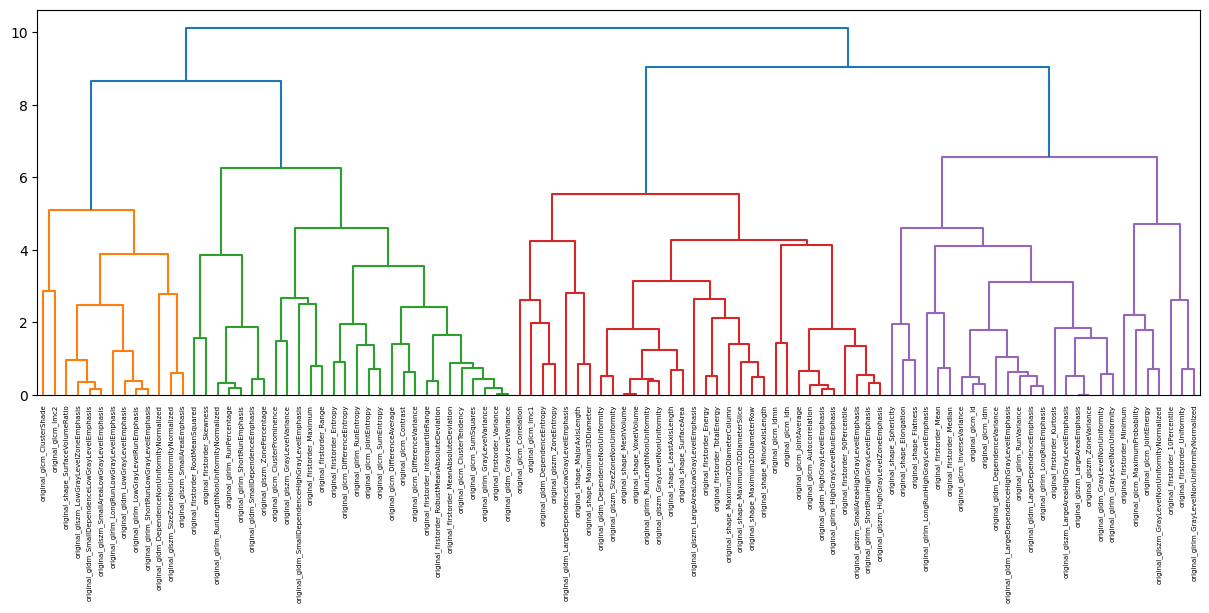

In [26]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

plt.figure(figsize=(15,5))
dissimilarity = 1 - abs(correlations)
Z = linkage(correlations, method='complete')
dendrogram(Z, labels=DL_features.columns, 
           leaf_rotation=90);

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

# Generate example correlation matrices (replace these with your own data)
correlation_matrix1 = DL_features.corr()
correlation_matrix2 = HC_features.corr()
Z = linkage(correlation_matrix1, method='complete')


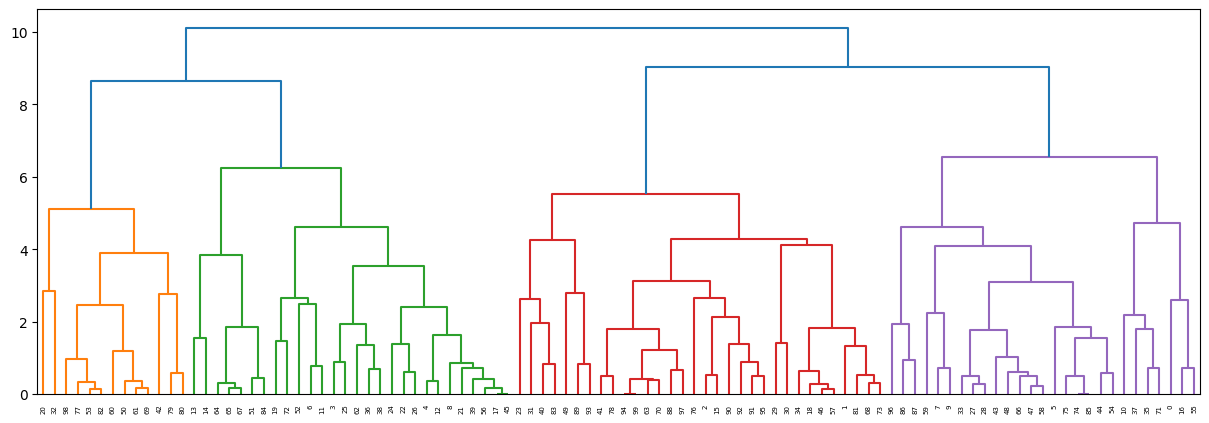

In [28]:
plt.figure(figsize=(15,5))
dn = dendrogram(Z)

In [29]:
features_order = dn.get("leaves")
features = DL_features.columns

In [30]:
reorder_features = [features[i] for i in features_order]


In [31]:
HC_new_order = HC_features[reorder_features]
HC_new_order

original_glcm_ClusterShade  original_glcm_Imc2   
0                  -2285.722545            0.803272  \
1                  -1550.034184            0.699659   
2                  -1272.245157            0.760635   
3                  -5332.149814            0.868241   
4                   -592.882657            0.552288   
..                          ...                 ...   
132                -7378.929982            0.799084   
133                -4279.622271            0.812747   
134                 2998.089218            0.834945   
135                25788.848345            0.902429   
136                -8735.489546            0.935623   

     original_shape_SurfaceVolumeRatio   
0                             0.704332  \
1                             0.536836   
2                             0.564540   
3                             0.768593   
4                             0.369486   
..                                 ...   
132                           0.427755   
133                           0.283964   
134                           0.542207   
135                           0.337831   
136                           0.285459   

     original_glszm_LowGrayLevelZoneEmphasis   
0                                   0.004653  \
1                                   0.005719   
2                                   0.004185   
3                                   0.003278   
4                                   0.002405   
..                                       ...   
132                                 0.022702   
133                                 0.004317   
134                                 0.015167   
135                                 0.017808   
136                                 0.002715   

     original_gldm_SmallDependenceLowGrayLevelEmphasis   
0                                             0.001690  \
1                                             0.001968   
2                                             0.001531   
3                                             0.001468   
4                                             0.000402   
..                                                 ...   
132                                           0.010996   
133                                           0.002038   
134                                           0.008086   
135                                           0.005540   
136                                           0.000369   

     original_glszm_SmallAreaLowGrayLevelEmphasis   
0                                        0.004058  \
1                                        0.005355   
2                                        0.003904   
3                                        0.003063   
4                                        0.002008   
..                                            ...   
132                                      0.016135   
133                                      0.003532   
134                                      0.012854   
135                                      0.011601   
136                                      0.001617   

     original_glrlm_LongRunLowGrayLevelEmphasis   
0                                      0.003367  \
1                                      0.003234   
2                                      0.002565   
3                                      0.002140   
4                                      0.002203   
..                                          ...   
132                                    0.039815   
133                                    0.003622   
134                                    0.015598   
135                                    0.025020   
136                                    0.002774   

     original_gldm_LowGrayLevelEmphasis   
0                              0.002638  \
1                              0.002673   
2                              0.002142   
3                              0.001891   
4                              0.001226   
..                                  ...   
132           

In [32]:
HC_new_order.corr()

original_glcm_ClusterShade   
original_glcm_ClusterShade                                           1.000000  \
original_glcm_Imc2                                                   0.096315   
original_shape_SurfaceVolumeRatio                                   -0.036463   
original_glszm_LowGrayLevelZoneEmphasis                              0.057722   
original_gldm_SmallDependenceLowGrayLevelEmphasis                   -0.044941   
...                                                                       ...   
original_glcm_JointEnergy                                            0.012813   
original_glszm_GrayLevelNonUniformityNormalized                      0.211937   
original_firstorder_10Percentile                                    -0.181714   
original_firstorder_Uniformity                                       0.053871   
original_glrlm_GrayLevelNonUniformityNormalized                      0.083488   

                                                   original_glcm_Imc2   
original_glcm_ClusterShade                                   0.096315  \
original_glcm_Imc2                                           1.000000   
original_shape_SurfaceVolumeRatio                            0.293009   
original_glszm_LowGrayLevelZoneEmphasis                     -0.103663   
original_gldm_SmallDependenceLowGrayLevelEmphasis            0.127254   
...                                                               ...   
original_glcm_JointEnergy                                   -0.283858   
original_glszm_GrayLevelNonUniformityNormalized             -0.597447   
original_firstorder_10Percentile                            -0.576883   
original_firstorder_Uniformity                              -0.506043   
original_glrlm_GrayLevelNonUniformityNormalized             -0.581835   

                                                   original_shape_SurfaceVolumeRatio   
original_glcm_ClusterShade                                                 -0.036463  \
original_glcm_Imc2                                                          0.293009   
original_shape_SurfaceVolumeRatio                                           1.000000   
original_glszm_LowGrayLevelZoneEmphasis                                     0.187596   
original_gldm_SmallDependenceLowGrayLevelEmphasis                           0.259264   
...                                                                              ...   
original_glcm_JointEnergy                                                  -0.201834   
original_glszm_GrayLevelNonUniformityNormalized                             0.061961   
original_firstorder_10Percentile                                           -0.103484   
original_firstorder_Uniformity                                             -0.234702   
original_glrlm_GrayLevelNonUniformityNormalized                            -0.213145   

                                                   original_glszm_LowGrayLevelZoneEmphasis   
original_glcm_ClusterShade                                                        0.057722  \
original_glcm_Imc2                                                               -0.103663   
original_shape_SurfaceVolumeRatio                                                 0.187596   
original_glszm_LowGrayLevelZoneEmphasis                                           1.000000   
original_gldm_SmallDependenceLowGrayLevelEmphasis                                 0.842031   
...                                                                                    ...   
original_glcm_JointEnergy                                                        -0.109541   
original_glszm_GrayLevelNonUniformityNormalized                                   0.166458   
original_firstorder_10Percentile                                                 -0.492449   
original_firstorder_Uniformity                                                   -0.048126   
original_glrlm_GrayLevelNonUniformityNormalized                                   0.002382   

               

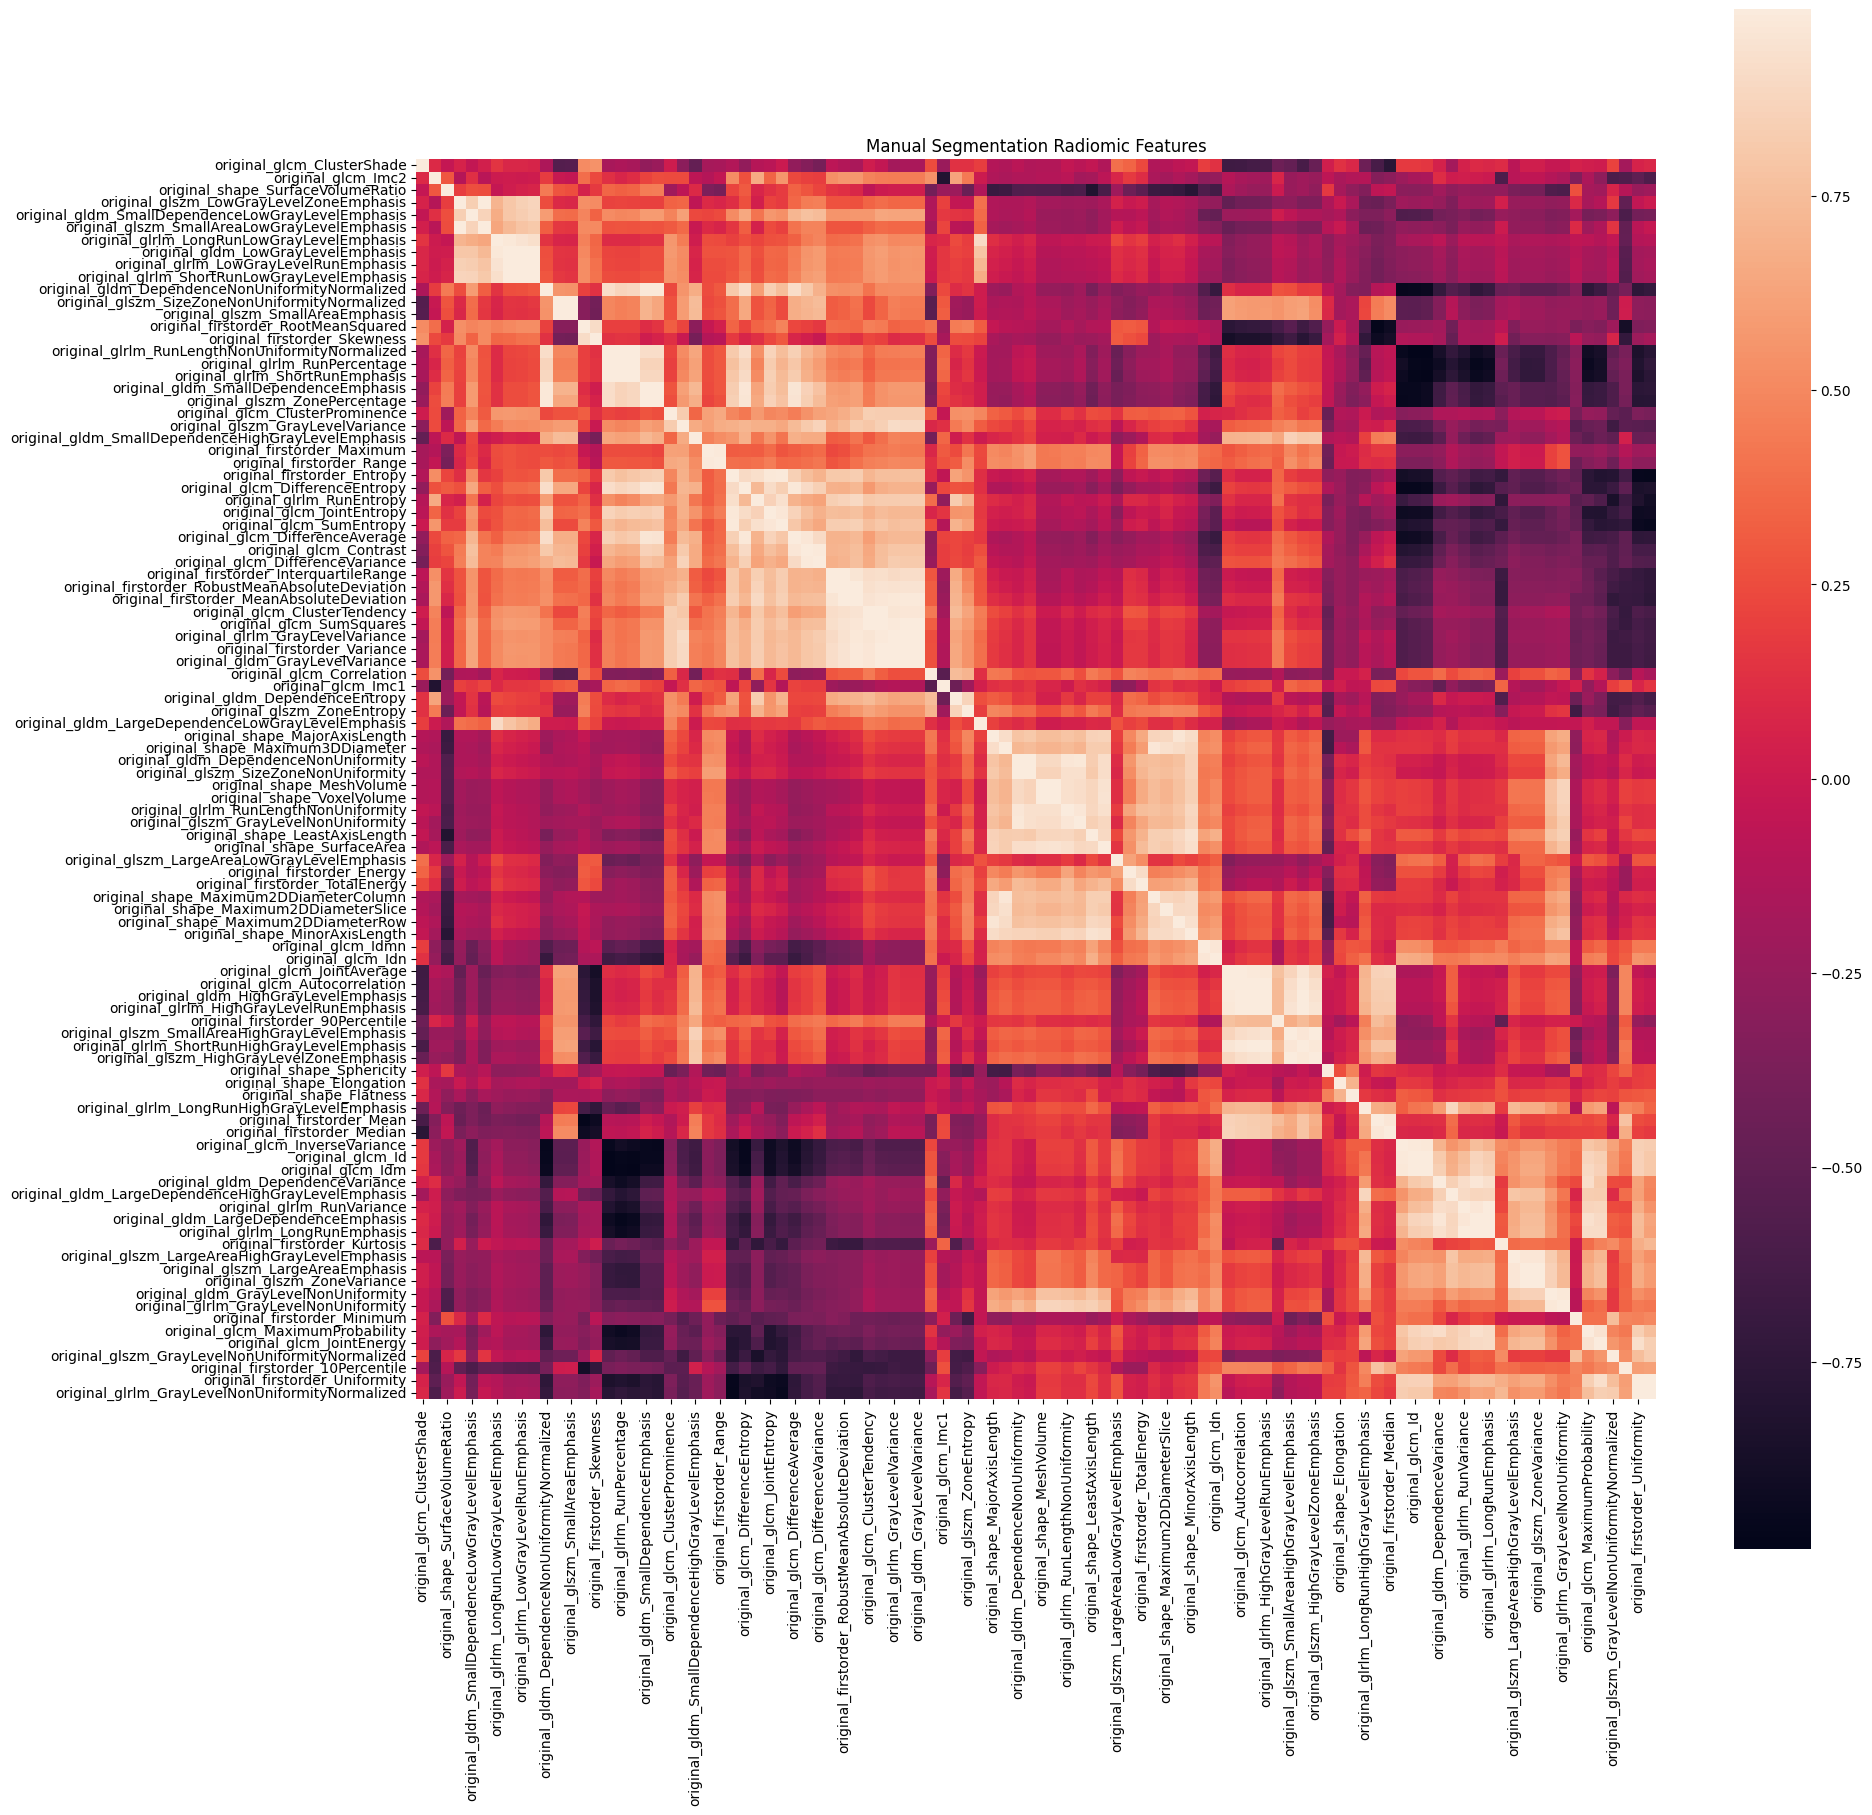

In [51]:
plt.figure(figsize=(20, 20))
# Draw the heatmap using seaborn
sns.heatmap(HC_new_order.corr(), vmax=.99, square=True)
plt.title("Manual Segmentation Radiomic Features")
plt.show()

In [44]:
DL_new_order = DL_features[reorder_features]
DL_new_order.corr()

original_glcm_ClusterShade   
original_glcm_ClusterShade                                           1.000000  \
original_glcm_Imc2                                                   0.072096   
original_shape_SurfaceVolumeRatio                                    0.145051   
original_glszm_LowGrayLevelZoneEmphasis                              0.059730   
original_gldm_SmallDependenceLowGrayLevelEmphasis                    0.076457   
...                                                                       ...   
original_glcm_JointEnergy                                            0.076674   
original_glszm_GrayLevelNonUniformityNormalized                      0.191588   
original_firstorder_10Percentile                                     0.021236   
original_firstorder_Uniformity                                       0.011254   
original_glrlm_GrayLevelNonUniformityNormalized                      0.040118   

                                                   original_glcm_Imc2   
original_glcm_ClusterShade                                   0.072096  \
original_glcm_Imc2                                           1.000000   
original_shape_SurfaceVolumeRatio                            0.327663   
original_glszm_LowGrayLevelZoneEmphasis                      0.216107   
original_gldm_SmallDependenceLowGrayLevelEmphasis            0.175200   
...                                                               ...   
original_glcm_JointEnergy                                    0.120043   
original_glszm_GrayLevelNonUniformityNormalized              0.086296   
original_firstorder_10Percentile                            -0.474438   
original_firstorder_Uniformity                              -0.143884   
original_glrlm_GrayLevelNonUniformityNormalized             -0.153363   

                                                   original_shape_SurfaceVolumeRatio   
original_glcm_ClusterShade                                                  0.145051  \
original_glcm_Imc2                                                          0.327663   
original_shape_SurfaceVolumeRatio                                           1.000000   
original_glszm_LowGrayLevelZoneEmphasis                                     0.928044   
original_gldm_SmallDependenceLowGrayLevelEmphasis                           0.925534   
...                                                                              ...   
original_glcm_JointEnergy                                                   0.871488   
original_glszm_GrayLevelNonUniformityNormalized                             0.906101   
original_firstorder_10Percentile                                            0.142763   
original_firstorder_Uniformity                                              0.474629   
original_glrlm_GrayLevelNonUniformityNormalized                             0.586920   

                                                   original_glszm_LowGrayLevelZoneEmphasis   
original_glcm_ClusterShade                                                        0.059730  \
original_glcm_Imc2                                                                0.216107   
original_shape_SurfaceVolumeRatio                                                 0.928044   
original_glszm_LowGrayLevelZoneEmphasis                                           1.000000   
original_gldm_SmallDependenceLowGrayLevelEmphasis                                 0.990613   
...                                                                                    ...   
original_glcm_JointEnergy                                                         0.920936   
original_glszm_GrayLevelNonUniformityNormalized                                   0.902633   
original_firstorder_10Percentile                                                  0.029353   
original_firstorder_Uniformity                                                    0.494181   
original_glrlm_GrayLevelNonUniformityNormalized                                   0.605434   

               

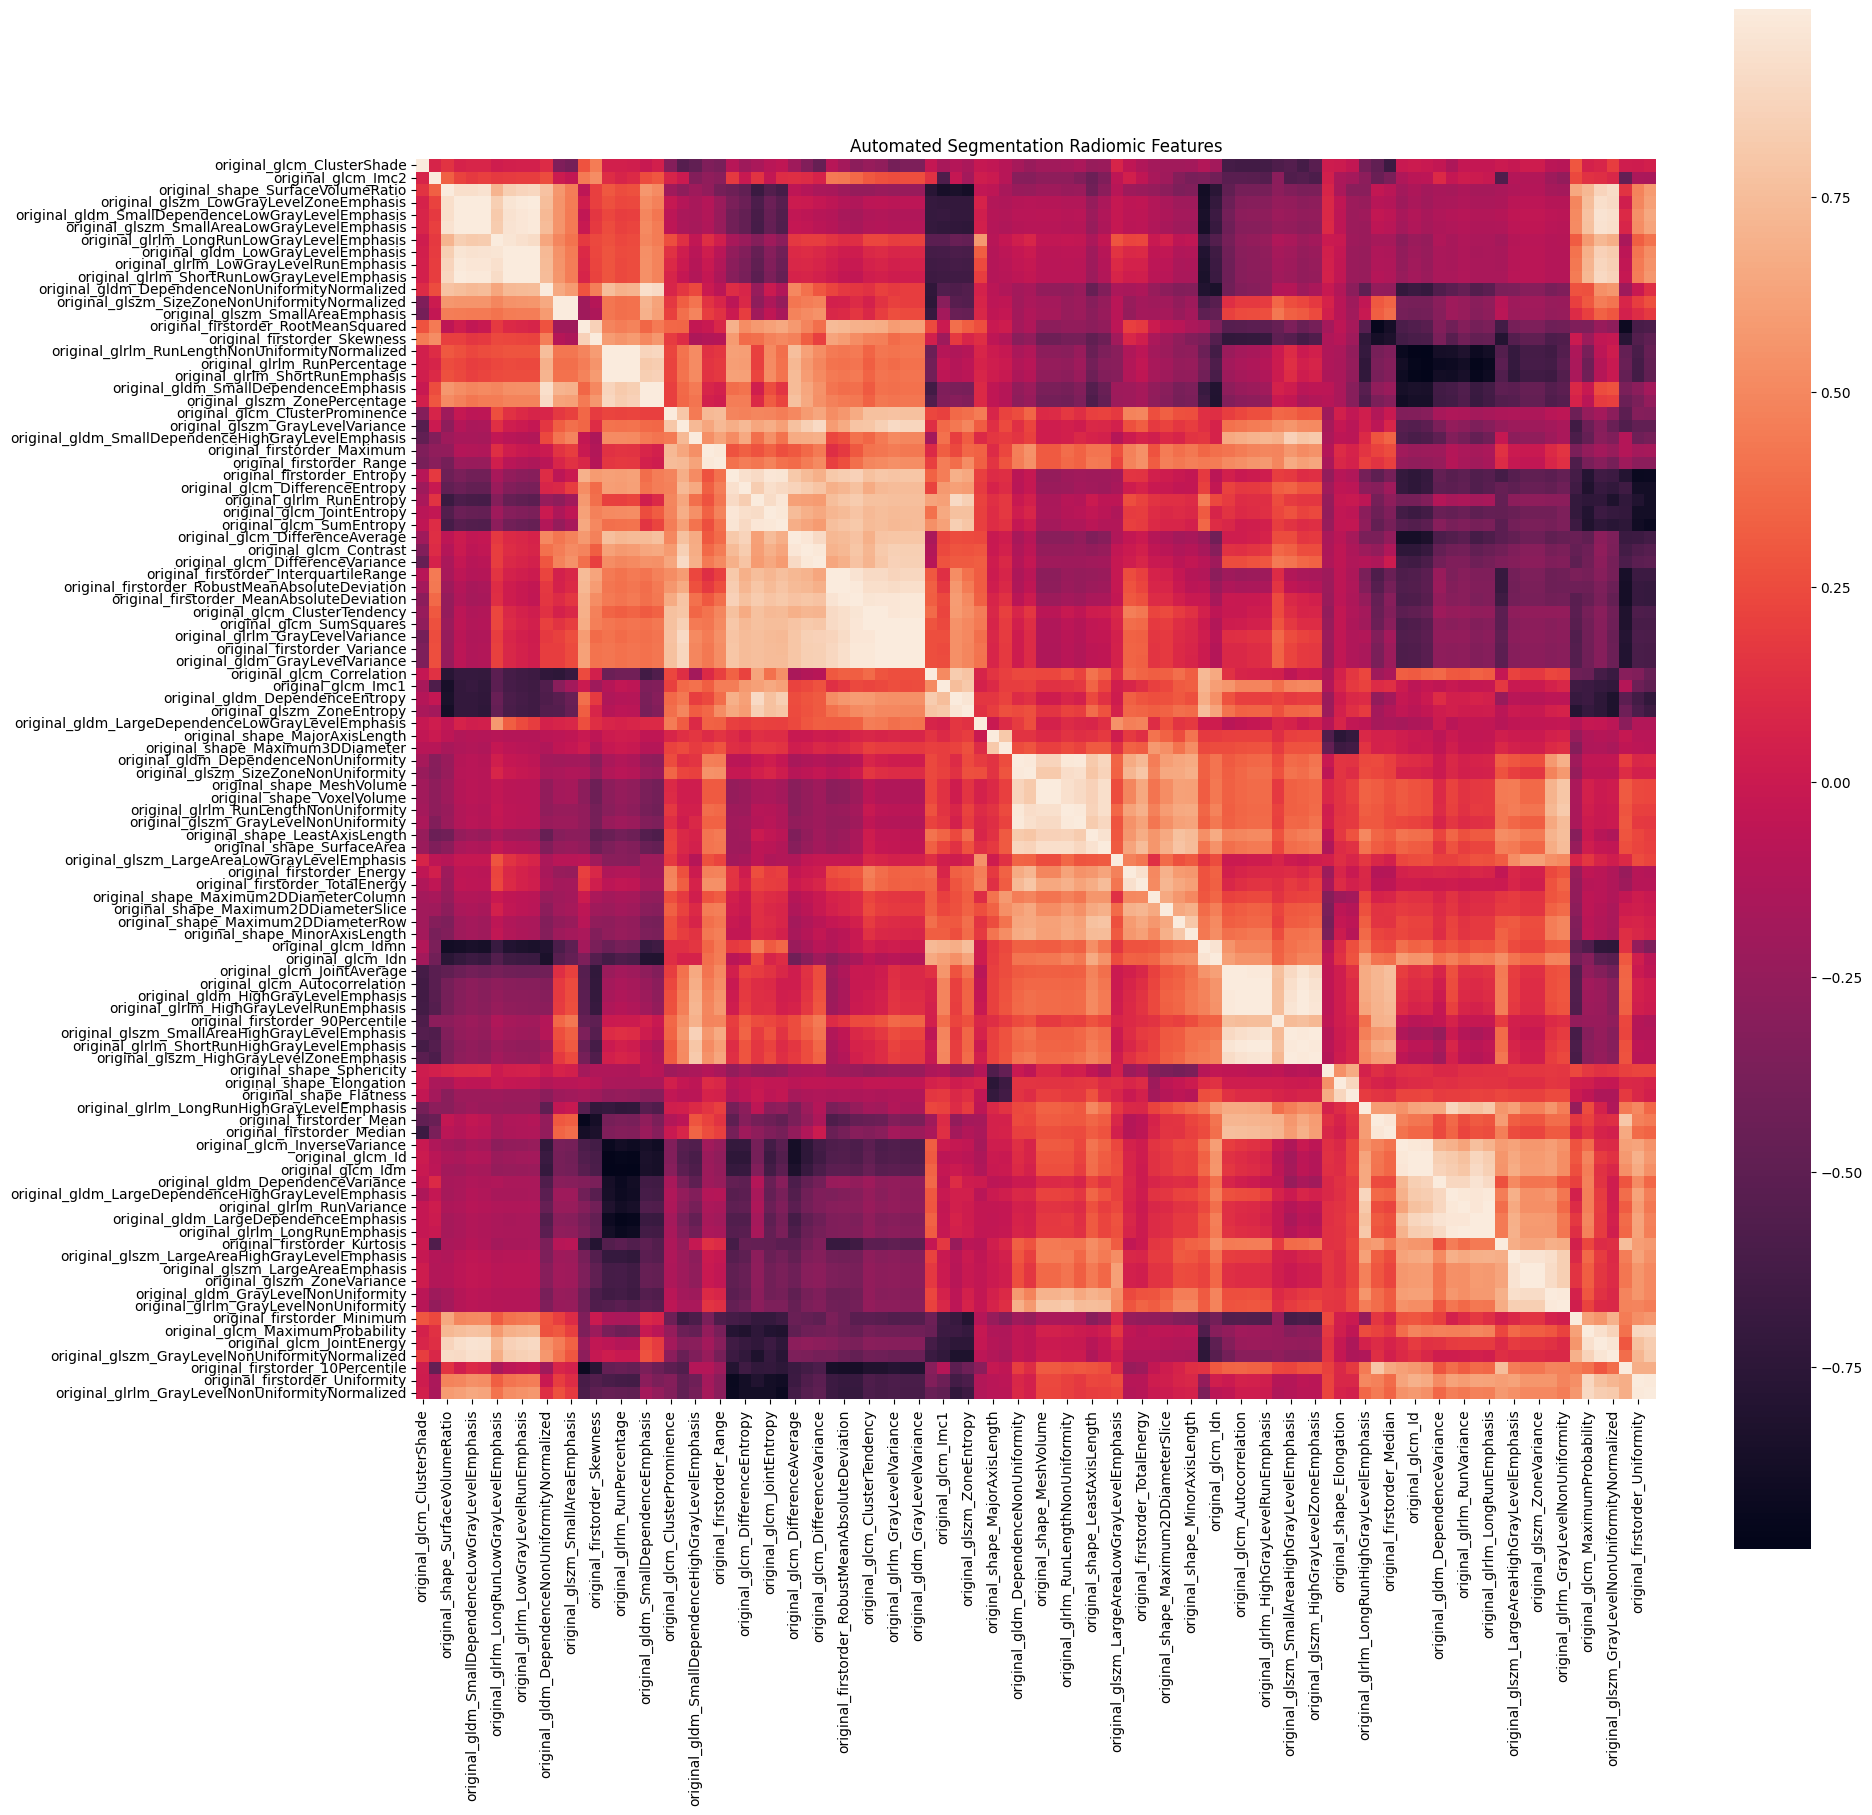

In [50]:
plt.figure(figsize=(20, 20))

# Draw the heatmap using seaborn
sns.heatmap(DL_new_order.corr(), vmax=.99, square=True)
plt.title("Automated Segmentation Radiomic Features")
plt.show()

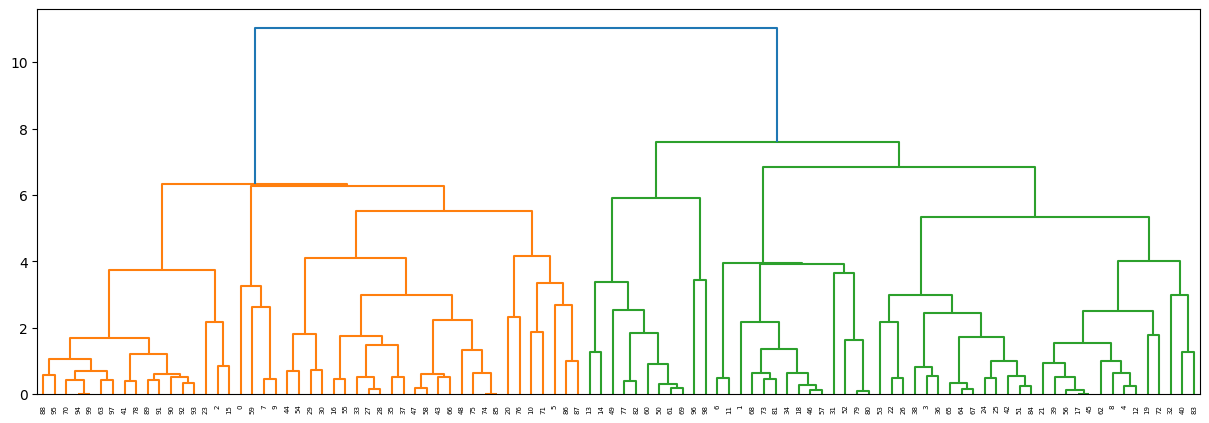

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering

# Generate example correlation matrices (replace these with your own data)
correlation_matrix1 = DL_features.corr()
correlation_matrix2 = HC_features.corr()
Z = linkage(correlation_matrix2, method='complete')

plt.figure(figsize=(15,5))
dn = dendrogram(Z)

<Figure size 1500x1000 with 0 Axes>

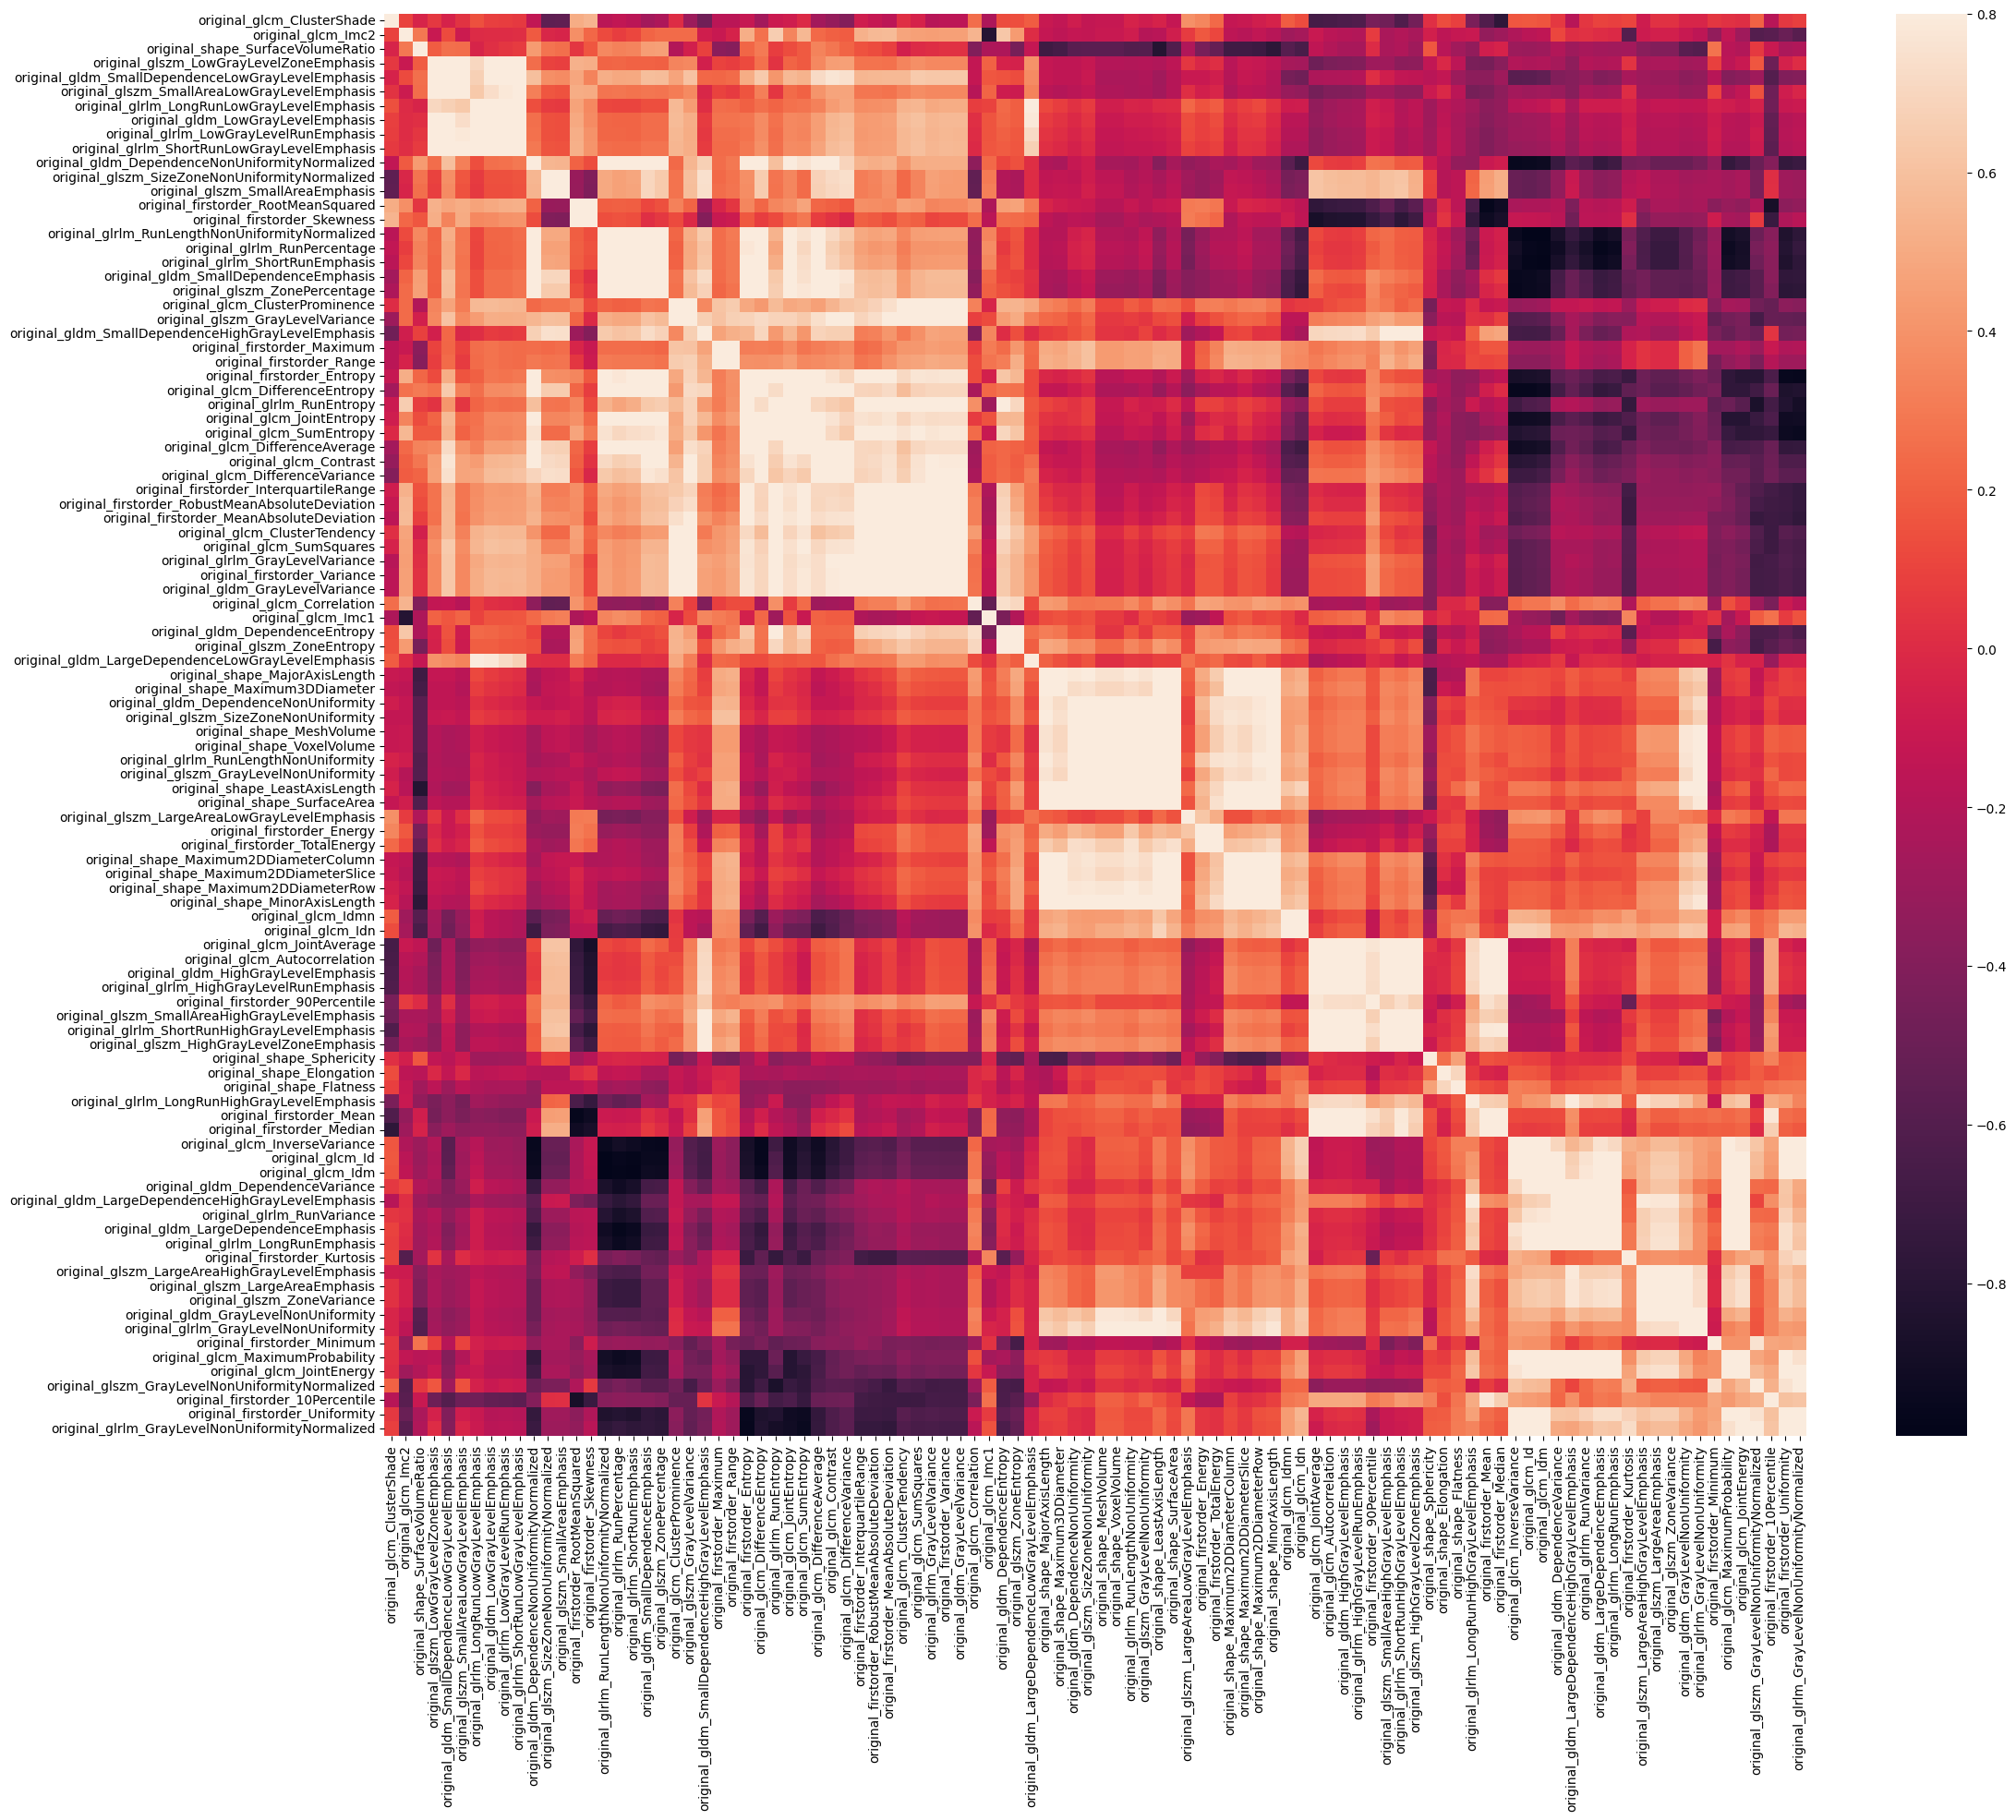

In [25]:
reorder_features = [features[i] for i in features_order]

DL_new_order = HC_features[reorder_features]
DL_new_order
DL_new_order.corr()
plt.figure(figsize=(15,10))


# Set up the matplotlib figure, make it big!
f, ax = plt.subplots(figsize=(25, 20))

# Draw the heatmap using seaborn
sns.heatmap(DL_new_order.corr(), vmax=.8, square=True)
plt.show()